In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_path = "C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv"
test_path = "C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Test.csv"

In [3]:
# Load the train and test datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_18384\308583163.py:3: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(test_path)


In [4]:
# Check the first few rows of the training dataset
print("Training Data:")
print(train_df.head())

# Basic information about the dataset
print("\nTraining Data Info:")
print(train_df.info())

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

Training Data:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  AntispamDirec

In [5]:
# Check the first few rows and the DataFrame structure
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [6]:
# Analyze the distribution of the target variable
print("\nIncidentGrade Distribution:")
print(train_df['IncidentGrade'].value_counts())


IncidentGrade Distribution:
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9788\47834102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncidentGrade', data=train_df, palette='viridis')


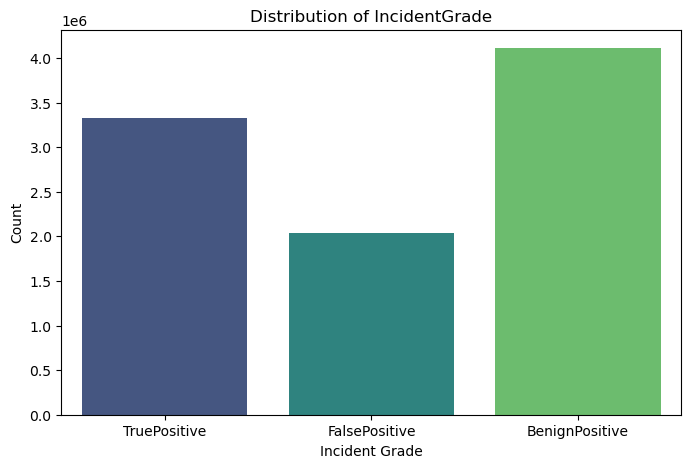

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='IncidentGrade', data=train_df, palette='viridis')
plt.title('Distribution of IncidentGrade')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.show()

In [13]:
# Handling missing values
for column in train_df.columns:
    if train_df[column].isnull().sum() > 0:  # Check if there are missing values
        if train_df[column].dtype == 'object':  # Categorical column
            mode_value = train_df[column].mode()[0]  # Get the mode
            train_df[column].fillna(mode_value, inplace=True)  # Fill with mode
        else:  # Numerical column
            median_value = train_df[column].median()  # Get the median
            train_df[column].fillna(median_value, inplace=True)  # Fill with median

print("\nMissing values handled.")

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9788\2583799210.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(mode_value, inplace=True)  # Fill with mode
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9788\2583799210.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 


Missing values handled.


In [7]:
# Example of feature engineering with a timestamp column (if it exists)
if 'Timestamp' in train_df.columns:
    train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])  # Convert to datetime
    train_df['Year'] = train_df['Timestamp'].dt.year
    train_df['Month'] = train_df['Timestamp'].dt.month
    train_df['Day'] = train_df['Timestamp'].dt.day
    train_df['Hour'] = train_df['Timestamp'].dt.hour

# Display the new features
print("\nNew features created from Timestamp:")
print(train_df[['Year', 'Month', 'Day', 'Hour']].head())


New features created from Timestamp:
   Year  Month  Day  Hour
0  2024      6    4     6
1  2024      6   14     3
2  2024      6   13     4
3  2024      6   10    16
4  2024      6   15     1


In [8]:
import pandas as pd

# Define the relevant categorical features to encode
categorical_features = ['Category', 'MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole']

# Encode the target variable
train_df['IncidentGrade'] = train_df['IncidentGrade'].map({'TP': 0, 'BP': 1, 'FP': 2})

# For the categorical features, we'll use label encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through the categorical features and apply label encoding
for feature in categorical_features:
    train_df[feature] = label_encoder.fit_transform(train_df[feature].astype(str))

# Check the updated DataFrame
print(train_df.head())

              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247 2024-06-04 06:05:15+00:00   
1   455266534868     88         326   210035 2024-06-14 03:01:25+00:00   
2  1056561957389    809       58352   712507 2024-06-13 04:52:55+00:00   
3  1279900258736     92       32992   774301 2024-06-10 16:39:36+00:00   
4   214748368522    148        4359   188041 2024-06-15 01:08:07+00:00   

   DetectorId  AlertTitle  Category  MitreTechniques  IncidentGrade  ...  \
0           7           6        10             1193            NaN  ...   
1          58          43         7             1193            NaN  ...   
2         423         298        10              864            NaN  ...   
3           2           2         1             1193            NaN  ...   
4           9          74         6             1193            NaN  ...   

   AntispamDirection  SuspicionLevel  LastVerdict  CountryCode  State   City  \
0                N

In [9]:
# Load the entire training dataset
train_df = pd.read_csv("C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv")

# Check for missing values and distribution of IncidentGrade
print("Total entries in the dataset:", train_df.shape[0])
print("Missing values in 'IncidentGrade':", train_df['IncidentGrade'].isnull().sum())

# Show distribution of IncidentGrade
print("\nDistribution of IncidentGrade:")
print(train_df['IncidentGrade'].value_counts())

# Now let's attempt to filter and create our feature and target datasets without dropping too many samples
# Fill NaNs in IncidentGrade with a placeholder (if acceptable) or sample from available values
# If you prefer dropping, uncomment the following line:
# train_df = train_df.dropna(subset=['IncidentGrade'])

# Use all available data, but let's make sure we can split correctly
X = train_df.drop(['IncidentGrade', 'Id', 'Timestamp'], axis=1, errors='ignore')
y = train_df['IncidentGrade'].dropna()  # Only drop NaNs in y

# Align X with the non-NaN indices of y
X = X.loc[y.index]

# Check for empty datasets before splitting
if X.empty or y.empty:
    raise ValueError("X or y is empty after preprocessing. Please check the data.")

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Total entries in the dataset: 9516837
Missing values in 'IncidentGrade': 51340

Distribution of IncidentGrade:
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64
Training data shape: (7572397, 42)
Validation data shape: (1893100, 42)


In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns (these are just examples, adjust as needed)
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Check the shapes after processing
print("Processed training data shape:", X_train_processed.shape)
print("Processed validation data shape:", X_val_processed.shape)


Processed training data shape: (7572397, 2995)
Processed validation data shape: (1893100, 2995)


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Separate numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create pipelines for numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

print("Processed training data shape after imputation and encoding:", X_train_processed.shape)
print("Processed validation data shape after imputation and encoding:", X_val_processed.shape)


Processed training data shape after imputation and encoding: (7572397, 2986)
Processed validation data shape after imputation and encoding: (1893100, 2986)


In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import numpy as np
from scipy.sparse import csr_matrix

# Define the batch size for incremental processing
batch_size = 100000

# Set up truncated SVD to reduce dimensionality even more (40 components)
svd = TruncatedSVD(n_components=40, random_state=42)
X_train_sparse = csr_matrix(X_train_processed)  # Ensure the data is sparse

# Fit SVD incrementally
svd.fit(X_train_sparse[:batch_size])  # Fit on a smaller subset initially to save memory

# Define the classifier for incremental training
clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

# Incrementally train on batches
for start in range(0, X_train_sparse.shape[0], batch_size):
    end = min(start + batch_size, X_train_sparse.shape[0])
    X_batch = X_train_sparse[start:end]
    y_batch = y_train.iloc[start:end]

    # Reduce dimensions with SVD
    X_batch_reduced = svd.transform(X_batch)
    
    # Shuffle for better SGD convergence
    X_batch_reduced, y_batch = shuffle(X_batch_reduced, y_batch, random_state=42)
    
    # Incremental fit
    clf.partial_fit(X_batch_reduced, y_batch, classes=np.unique(y_train))

# Reduce and evaluate on validation set
X_val_reduced = svd.transform(csr_matrix(X_val_processed))
y_val_pred = clf.predict(X_val_reduced)

# Evaluate the model
print(classification_report(y_val, y_val_pred, target_names=['BenignPositive', 'TruePositive', 'FalsePositive']))


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

BenignPositive       0.00      0.00      0.00    822164
  TruePositive       0.33      0.00      0.00    406393
 FalsePositive       0.35      1.00      0.52    664543

      accuracy                           0.35   1893100
     macro avg       0.23      0.33      0.17   1893100
  weighted avg       0.19      0.35      0.18   1893100



c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Missing values in Train dataset:
 MitreTechniques      5468386
IncidentGrade          51340
ActionGrouped        9460773
ActionGranular       9460773
EmailClusterId       9420025
ThreatFamily         9441956
ResourceType         9509762
Roles                9298686
AntispamDirection    9339535
SuspicionLevel       8072708
LastVerdict          7282572
dtype: int64

Missing values in Test dataset:
 MitreTechniques      2307104
ActionGrouped        4146079
ActionGranular       4146079
EmailClusterId       4106285
ThreatFamily         4116614
ResourceType         4144998
Roles                4039317
AntispamDirection    4071481
SuspicionLevel       3498157
LastVerdict          3155260
dtype: int64


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_20780\1251916731.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncidentGrade', data=train_df, palette='viridis')


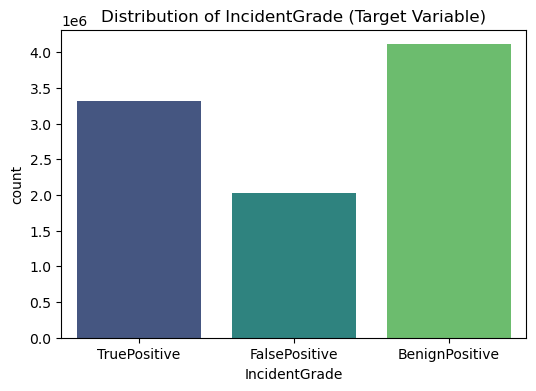

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in train and test datasets
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Display columns with missing values
print("Missing values in Train dataset:\n", missing_train[missing_train > 0])
print("\nMissing values in Test dataset:\n", missing_test[missing_test > 0])

# Check the distribution of the target variable 'IncidentGrade' in train dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='IncidentGrade', data=train_df, palette='viridis')
plt.title('Distribution of IncidentGrade (Target Variable)')
plt.show()

# Statistical summary of numerical features
train_df.describe()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values (example: using mean for numerical and most frequent for categorical)
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Assuming categorical columns are of 'object' type and numerical columns are of other types
cat_cols = train_df.select_dtypes(include=['object']).columns
num_cols = train_df.select_dtypes(exclude=['object']).columns

# Apply imputation
train_df[num_cols] = imputer_num.fit_transform(train_df[num_cols])
train_df[cat_cols] = imputer_cat.fit_transform(train_df[cat_cols])

# Encode categorical variables (example: using Label Encoding)
label_encoder = LabelEncoder()
for col in cat_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Splitting the training data into train and validation sets (80-20 split with stratification)
X = train_df.drop('IncidentGrade', axis=1)
y = train_df['IncidentGrade']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Train a baseline Logistic Regression model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = baseline_model.predict(X_val)

# Evaluate the model
print("Classification Report for Baseline Model:\n")
print(classification_report(y_val, y_pred))

# Macro-F1 Score, Precision, and Recall
f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro-F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Baseline Model:

              precision    recall  f1-score   support

           0       0.45      0.89      0.60    832432
           1       0.54      0.00      0.01    406393
           2       0.38      0.14      0.20    664543

    accuracy                           0.44   1903368
   macro avg       0.46      0.34      0.27   1903368
weighted avg       0.45      0.44      0.33   1903368

Macro-F1 Score: 0.2690
Precision: 0.4578
Recall: 0.3445


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Train Random Forest Classifier with limited estimators and depth to speed up
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_val)

# Evaluate Random Forest model
print("Classification Report for Random Forest Model (Faster Training):\n")
print(classification_report(y_val, rf_pred))

# Hyperparameter tuning for Random Forest using GridSearchCV (with fewer options)
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduce the number of estimators
    'max_depth': [5, 10],       # Reduce max_depth to simplify
    'min_samples_split': [2],   # Single value to avoid extra tuning overhead
}

# Use fewer cross-validation folds (cv=2) to speed up grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='f1_macro', cv=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Macro-F1 Score from Grid Search:", grid_search_rf.best_score_)


Classification Report for Random Forest Model (Faster Training):

              precision    recall  f1-score   support

           0       0.66      0.98      0.79    832432
           1       0.94      0.49      0.65    406393
           2       0.96      0.66      0.79    664543

    accuracy                           0.76   1903368
   macro avg       0.85      0.71      0.74   1903368
weighted avg       0.82      0.76      0.76   1903368

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Macro-F1 Score from Grid Search: 0.7434532622200317


In [20]:
# Debug: Check best parameters
best_params = grid_search_rf.best_params_
print("Best Parameters from Grid Search:", best_params)

# Create a new model with the best parameters
optimized_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Fit on the entire training dataset
optimized_rf_model.fit(X_train, y_train)


Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [22]:
try:
    # Make predictions on the test data
    rf_test_pred = optimized_rf_model.predict(X_test)

    # Evaluate and print the classification report on the test data
    from sklearn.metrics import classification_report  # Ensure this is imported
    print("Classification Report for Optimized Random Forest on Test Data:\n")
    print(classification_report(y_test, rf_test_pred))

except Exception as e:
    print(f"Error encountered: {e}")


Error encountered: name 'X_test' is not defined


In [23]:
# Load the training and testing datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the training data
print("Training Data Sample:")
print(train_data.head())

# Display the first few rows of the testing data
print("\nTesting Data Sample:")
print(test_data.head())


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_20780\3856397674.py:3: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_path)


Training Data Sample:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  Antisp

In [24]:
# Verify columns in the training data
print("Columns in training data:")
print(train_data.columns)

# Check if the 'label' column exists
if 'label' in train_data.columns:
    print("'label' column exists in the training data.")
else:
    print("'label' column is missing. Please check the column name.")

# If 'label' exists, plot; otherwise, skip
if 'label' in train_data.columns:
    sns.countplot(x='label', data=train_data)  # Replace 'label' if necessary
    plt.title('Target Variable Distribution in Training Data')
    plt.show()
else:
    print("Skipping plot since 'label' column is missing.")



Columns in training data:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')
'label' column is missing. Please check the column name.
Skipping plot since 'label' column is missing.


In [20]:
# Define file paths
train_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv"
test_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv"

# Load the datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display columns in the training data
print("Training Data Columns:")
print(train_data.columns)


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_30620\1034960257.py:7: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_path)


Training Data Columns:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')


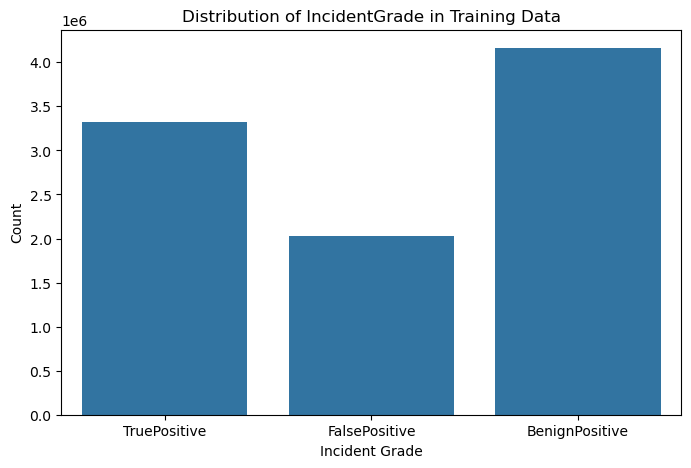

In [24]:
# Target Variable Distribution
# Adjust 'IncidentGrade' if your target column has a different name
plt.figure(figsize=(8, 5))
sns.countplot(x='IncidentGrade', data=train_data)
plt.title('Distribution of IncidentGrade in Training Data')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.show()


In [25]:
# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())

# Fill missing values: numerical columns with median, categorical columns with mode
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].median(), inplace=True)
        test_data[column].fillna(test_data[column].median(), inplace=True)


Missing values in training data:
 Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
ActionGrouped         0
ActionGranular        0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
EmailClusterId        0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
ThreatFamily          0
FileName              0
FolderPath            0
ResourceIdName        0
ResourceType          0
Roles                 0
OSFamily              0
OSVersion             0
AntispamDirection     0
Suspic

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_30620\1372486584.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].median(), inplace=True)
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_30620\1372486584.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [28]:
# Check for missing values and data types
print(train_df.info())
print(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [31]:
# Select only numerical columns
numerical_df = train_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix on numerical columns only
corr_matrix = numerical_df.corr()
print(corr_matrix)

                          Id     OrgId  IncidentId   AlertId  DetectorId  \
Id                  1.000000  0.007336    0.014532  0.009207    0.003071   
OrgId               0.007336  1.000000    0.026038  0.164287    0.166280   
IncidentId          0.014532  0.026038    1.000000  0.413221    0.059410   
AlertId             0.009207  0.164287    0.413221  1.000000    0.136389   
DetectorId          0.003071  0.166280    0.059410  0.136389    1.000000   
AlertTitle          0.008825  0.011603    0.137387  0.162036    0.266043   
DeviceId            0.003295  0.007714   -0.035787 -0.059150   -0.029402   
Sha256              0.002825  0.002947   -0.024252  0.006913   -0.021061   
IpAddress           0.012587  0.116409    0.135114  0.085904    0.043657   
Url                -0.009754  0.011526   -0.022715  0.065921    0.040892   
AccountSid         -0.003866 -0.034954   -0.035174 -0.096841    0.004608   
AccountUpn         -0.004486 -0.026358   -0.002902  0.017136    0.014782   
AccountObjec

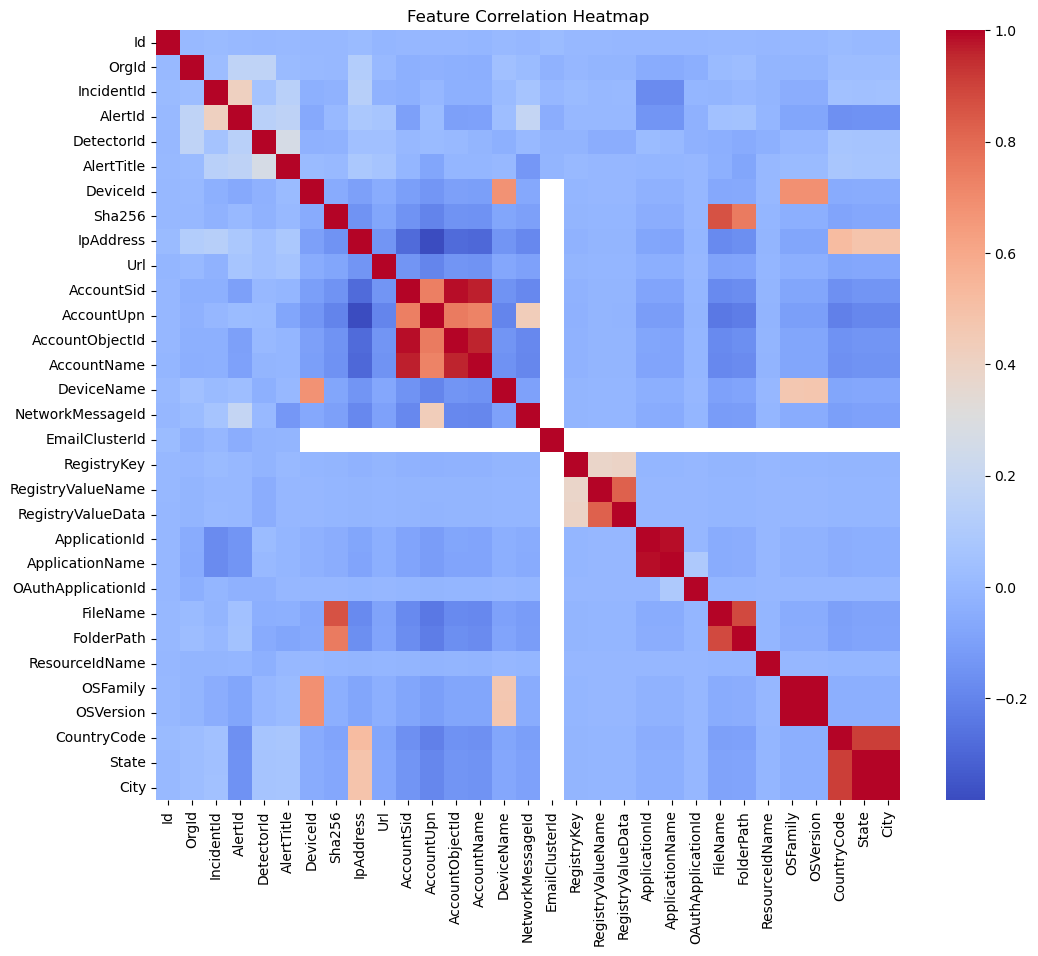

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

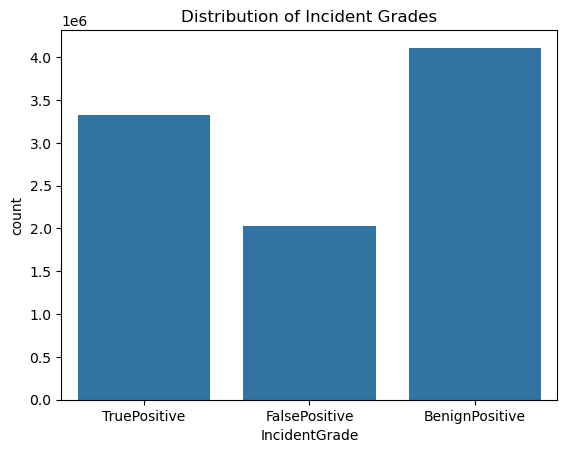

In [34]:
# Visualize the class distribution of 'IncidentGrade'
sns.countplot(x='IncidentGrade', data=train_df)
plt.title('Distribution of Incident Grades')
plt.show()

In [35]:
# Convert 'Timestamp' column to datetime format
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'], errors='coerce')

# Extract useful components from the datetime column
train_df['Year'] = train_df['Timestamp'].dt.year
train_df['Month'] = train_df['Timestamp'].dt.month
train_df['Day'] = train_df['Timestamp'].dt.day
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Minute'] = train_df['Timestamp'].dt.minute
train_df['Second'] = train_df['Timestamp'].dt.second

# Drop the original 'Timestamp' column as it's now redundant
train_df.drop(columns=['Timestamp'], inplace=True)

In [38]:
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
print("Number of unique values in each categorical column:")
print(train_df[categorical_columns].nunique())

Categorical columns: Index(['Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFamily',
       'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel',
       'LastVerdict'],
      dtype='object')
Number of unique values in each categorical column:
Category               20
MitreTechniques      1193
IncidentGrade           3
ActionGrouped           3
ActionGranular         16
EntityType             33
EvidenceRole            2
ThreatFamily         1745
ResourceType           25
Roles                  10
AntispamDirection       5
SuspicionLevel          2
LastVerdict             5
dtype: int64


In [40]:
# Reduce the dataset size temporarily to avoid memory issues
# Select a subset of the data (e.g., 1 million rows)
train_df_small = train_df.sample(n=1000000, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = train_df_small.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
train_df_small[numerical_columns] = scaler.fit_transform(train_df_small[numerical_columns])

# Check the transformed data
print(train_df_small.head())

               Id     OrgId  IncidentId   AlertId  DetectorId  AlertTitle  \
8036545  0.100875 -0.304946   -0.176648 -0.101832   -0.232001   -0.255950   
3828916  0.291290 -0.359393   -0.152337 -0.854524   -0.252780   -0.256561   
4404679  0.187428 -0.465693   -0.403960 -0.854333   -0.213532   -0.255425   
8854100  1.295296 -0.374949   -0.559680 -0.880123   -0.093481   -0.093093   
7977240 -1.439754 -0.413839   -0.583586 -0.009499   -0.245854   -0.256387   

              Category  MitreTechniques   IncidentGrade ActionGrouped  ...  \
8036545  InitialAccess             1106  BenignPositive           NaN  ...   
3828916  InitialAccess             1108  BenignPositive           NaN  ...   
4404679   Exfiltration             1193  BenignPositive           NaN  ...   
8854100   Exfiltration             1193   FalsePositive           NaN  ...   
7977240  InitialAccess             1193    TruePositive           NaN  ...   

        LastVerdict CountryCode     State      City  Year  Month  Da

In [43]:
# Split the data into features (X) and target (y)
X_train = train_df_small.drop(columns=['IncidentGrade'])
y_train = train_df_small['IncidentGrade']

# Check the shape of the new datasets
print(X_train.shape, y_train.shape)

(1000000, 49) (1000000,)


In [46]:
# Fill missing values in numerical columns with the column mean
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].mean())

# Fill missing values in categorical columns with the column mode
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

# Check if there are any missing values left
print(X_train.isnull().sum().sum())

0


In [48]:
# Fill missing values in numerical columns with the column mean
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].mean())

# Fill missing values in categorical columns with the column mode
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

# Check if there are any missing values in X_train
print(X_train.isnull().sum().sum())

# Check if y_train has missing values
print(y_train.isnull().sum())

# If there are any missing values in y_train, fill them with the mode
y_train = y_train.fillna(y_train.mode()[0])

# Check again for missing values in y_train
print(y_train.isnull().sum())

# Now you can train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))


0
5475
0


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                precision    recall  f1-score   support

BenignPositive       0.60      0.76      0.67    436962
 FalsePositive       0.59      0.20      0.30    213255
  TruePositive       0.62      0.65      0.64    349783

      accuracy                           0.60   1000000
     macro avg       0.60      0.54      0.53   1000000
  weighted avg       0.60      0.60      0.58   1000000



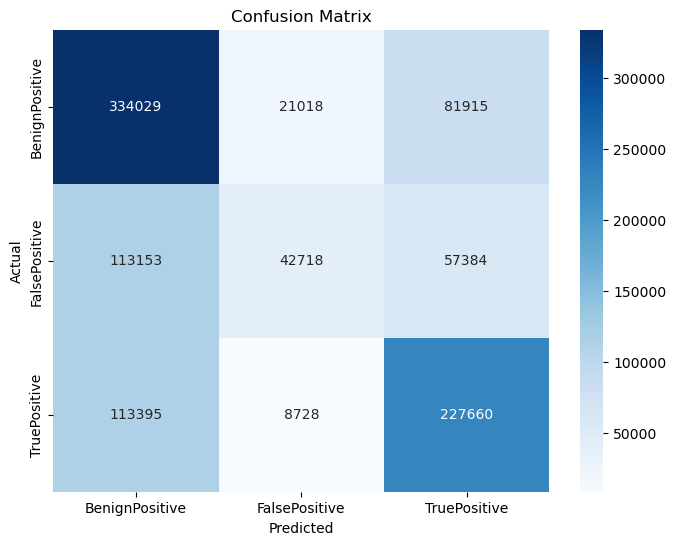

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BenignPositive', 'FalsePositive', 'TruePositive'], yticklabels=['BenignPositive', 'FalsePositive', 'TruePositive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Cross-validation scores: [0.6036   0.602545 0.601255 0.60456  0.605435]
Average cross-validation score: 0.6035


In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers to try
}

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_best))

Best hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
                precision    recall  f1-score   support

BenignPositive       0.60      0.80      0.68    436962
 FalsePositive       0.60      0.20      0.30    213255
  TruePositive       0.65      0.64      0.65    349783

      accuracy                           0.62   1000000
     macro avg       0.62      0.55      0.55   1000000
  weighted avg       0.62      0.62      0.59   1000000



In [52]:
# Handling missing values separately for numerical and categorical columns
# Fill missing values in numerical columns with the median
num_cols = test_df.select_dtypes(include=np.number).columns
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
cat_cols = test_df.select_dtypes(include='object').columns
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode().iloc[0])

# Verify no missing values remain
print(test_df.isnull().sum())


Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
ActionGrouped         0
ActionGranular        0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
EmailClusterId        0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
ThreatFamily          0
FileName              0
FolderPath            0
ResourceIdName        0
ResourceType          0
Roles                 0
OSFamily              0
OSVersion             0
AntispamDirection     0
SuspicionLevel        0
LastVerdict     

In [53]:
# Example of time-based feature extraction from 'Timestamp'
if 'Timestamp' in train_df.columns:
    train_df['Hour'] = pd.to_datetime(train_df['Timestamp']).dt.hour
    test_df['Hour'] = pd.to_datetime(test_df['Timestamp']).dt.hour

    # Creating additional time-based features (optional)
    train_df['Day'] = pd.to_datetime(train_df['Timestamp']).dt.day
    test_df['Day'] = pd.to_datetime(test_df['Timestamp']).dt.day

    # Drop 'Timestamp' column after feature extraction
    train_df.drop('Timestamp', axis=1, inplace=True)
    test_df.drop('Timestamp', axis=1, inplace=True)

# Check if 'ID' column exists before dropping it
if 'ID' in train_df.columns:
    train_df.drop('ID', axis=1, inplace=True)
if 'ID' in test_df.columns:
    test_df.drop('ID', axis=1, inplace=True)

# Check updated data after feature engineering
print(train_df.head())



              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category  MitreTechniques   IncidentGrade ActionGrouped  ...  \
0      InitialAccess             1193    TruePositive           NaN  ...   
1       Exfiltration             1193   FalsePositive           NaN  ...   
2      InitialAccess              864   FalsePositive           NaN  ...   
3  CommandAndControl             1193  BenignPositive           NaN  ...   
4          Execution             1193    TruePositive           NaN  ...   

  LastVerdict CountryCode State   City  Year  Month  Day  Hour  Minute  Second  
0         NaN          31    

In [3]:
# Step 1: Load the dataset if not already loaded
import pandas as pd

# Specify your dataset path
train_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv"

# Load the dataset
train_df = pd.read_csv(train_path)

# Step 2: Identify columns with missing values and fill them
# Fill numerical columns with the median
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())

# Fill categorical columns with 'Unknown'
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown')

# Step 3: Drop target column and any high-cardinality columns if they aren't essential
high_cardinality_columns = ['ThreatFamily', 'MitreTechniques']  # Adjust as needed
X = train_df.drop(columns=['IncidentGrade'] + high_cardinality_columns, errors='ignore')
y = train_df['IncidentGrade']

# Reduce memory usage by converting numeric columns to lower precision
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')
for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int32')

# Process categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform encoding on categorical columns
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    if X[col].nunique() < 100:  # Use one-hot encoding if unique values < 100
        X = pd.get_dummies(X, columns=[col], drop_first=True)
    else:
        # Use Label Encoding for high-cardinality columns
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Step 4: Split the data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the train and validation sets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

# Check the distribution of the target variable in the training and validation sets
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))


Training set shape: (7613469, 150), Validation set shape: (1903368, 150)
Training target distribution:
 IncidentGrade
BenignPositive    0.431952
TruePositive      0.349140
FalsePositive     0.213513
Unknown           0.005395
Name: proportion, dtype: float64
Validation target distribution:
 IncidentGrade
BenignPositive    0.431952
TruePositive      0.349141
FalsePositive     0.213513
Unknown           0.005395
Name: proportion, dtype: float64


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression with multiclass settings
log_reg = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial', solver='lbfgs')

# Train the model
log_reg.fit(X_train, y_train)

# Predict on validation set
y_pred = log_reg.predict(X_val)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred))

c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

BenignPositive       0.52      0.72      0.61    822164
 FalsePositive       0.27      0.00      0.00    406393
  TruePositive       0.52      0.60      0.55    664543
       Unknown       0.00      0.00      0.00     10268

      accuracy                           0.52   1903368
     macro avg       0.33      0.33      0.29   1903368
  weighted avg       0.46      0.52      0.46   1903368



c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load and prepare data
train_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv"
train_df = pd.read_csv(train_path)

# Fill missing values for numerical and categorical data
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown')

# Split into features and target, drop high-cardinality columns if needed
high_cardinality_columns = ['ThreatFamily', 'MitreTechniques']
X = train_df.drop(columns=['IncidentGrade'] + high_cardinality_columns, errors='ignore')
y = train_df['IncidentGrade']

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_val)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred))


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

BenignPositive       0.43      1.00      0.60    822164
 FalsePositive       0.00      0.00      0.00    406393
  TruePositive       0.00      0.00      0.00    664543
       Unknown       0.00      0.00      0.00     10268

      accuracy                           0.43   1903368
     macro avg       0.11      0.25      0.15   1903368
  weighted avg       0.19      0.43      0.26   1903368



c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
# Initialize Logistic Regression with balanced class weights
log_reg_balanced = LogisticRegression(random_state=42, class_weight='balanced', multi_class='multinomial', max_iter=200)

# Fit the model to the training data
log_reg_balanced.fit(X_train, y_train)

# Predict on the validation set
y_pred_balanced = log_reg_balanced.predict(X_val)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_balanced, target_names=y_val.unique()))

c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                precision    recall  f1-score   support

BenignPositive       0.53      0.60      0.56    822164
 FalsePositive       0.18      0.14      0.15    406393
  TruePositive       0.51      0.33      0.40    664543
       Unknown       0.04      0.88      0.08     10268

      accuracy                           0.41   1903368
     macro avg       0.31      0.49      0.30   1903368
  weighted avg       0.45      0.41      0.42   1903368



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize RandomForest with balanced class weights
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_clf.predict(X_val)

# Evaluate performance
print(classification_report(y_val, y_pred_rf, target_names=y_val.unique()))

                precision    recall  f1-score   support

BenignPositive       0.98      0.99      0.98    822164
 FalsePositive       0.98      0.97      0.97    406393
  TruePositive       0.99      0.98      0.98    664543
       Unknown       0.99      1.00      0.99     10268

      accuracy                           0.98   1903368
     macro avg       0.98      0.98      0.98   1903368
  weighted avg       0.98      0.98      0.98   1903368



In [4]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions (e.g., to 30 components)
pca = PCA(n_components=30, random_state=42)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)

print(f"Reduced training set shape: {X_train_reduced.shape}")
print(f"Reduced validation set shape: {X_val_reduced.shape}")


Reduced training set shape: (7613469, 30)
Reduced validation set shape: (1903368, 30)


In [5]:
# Convert data types to save memory
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

In [ ]:
# Redefining X and y in case previous cell was not run
X = train_df.drop('IncidentGrade', axis=1)  # Features (excluding the target)
y = train_df['IncidentGrade']               # Target variable (IncidentGrade)

# Re-splitting the data into training and validation sets (if needed)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# 2. Initialize the Random Forest model with class_weight set to 'balanced' to handle class imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 3. Fit the model on the training data
rf_model.fit(X_train, y_train)

# 4. Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# 5. Evaluate the performance of the model using macro-F1 score, precision, and recall
from sklearn.metrics import f1_score, precision_score, recall_score

macro_f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

# 6. Print evaluation metrics
print(f"Macro F1 Score (Validation): {macro_f1:.4f}")
print(f"Precision (Validation): {precision:.4f}")
print(f"Recall (Validation): {recall:.4f}")


In [2]:
train_path = "C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv"
test_path = "C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Test.csv"

In [3]:
print(test_df.columns)


NameError: name 'test_df' is not defined

In [34]:
print("Training Data Columns: ", train_df.columns)
print("Test Data Columns: ", test_df.columns)


Training Data Columns:  Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Hour',
       'Day'],
      dtype='object')
Test Data Columns:  Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'Eviden

In [35]:
target_column = 'Triage_Grade'  # Replace with the actual target column name


In [36]:
# Check the columns in the training and testing dataframes
print("Training DataFrame Columns:\n", train_df.columns)
print("\nTesting DataFrame Columns:\n", test_df.columns)

# Check for null values in the column
if 'Incident_Grade' in train_df.columns:
    print("Training 'Incident_Grade' has null values:\n", train_df['Incident_Grade'].isnull().sum())

if 'Incident_Grade' in test_df.columns:
    print("Testing 'Incident_Grade' has null values:\n", test_df['Incident_Grade'].isnull().sum())


Training DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Hour',
       'Day'],
      dtype='object')

Testing DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'Entity

In [37]:
# Rename the column if necessary (replace 'Possible_Incorrect_Name' with the actual column name)
train_df.rename(columns={'Possible_Incorrect_Name': 'Incident_Grade'}, inplace=True)
test_df.rename(columns={'Possible_Incorrect_Name': 'Incident_Grade'}, inplace=True)


In [38]:
# Check the column names in both datasets
print("Training DataFrame Columns:\n", train_df.columns)
print("Testing DataFrame Columns:\n", test_df.columns)


Training DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'Hour',
       'Day'],
      dtype='object')
Testing DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityT

In [16]:
# Rename the column to 'Incident_Grade' if there is a small typo or mismatch
train_df.rename(columns={'Incident_Grade ': 'Incident_Grade'}, inplace=True)
test_df.rename(columns={'Incident_Grade ': 'Incident_Grade'}, inplace=True)


In [17]:
print(train_df.columns)


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [18]:
if 'IncidentGrade' not in train_df.columns:
    raise ValueError("Target column 'IncidentGrade' does not exist in the training dataframe.")


In [19]:
# Load the validation dataset
validation_df = pd.read_csv(r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv")

# Check if it's loaded correctly
print(validation_df.head())

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9788\1957263305.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_df = pd.read_csv(r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv")


              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade  ...       Roles OSFamily OSVersion AntispamDirect

In [20]:
# Check for missing values in the dataset
print(validation_df.isnull().sum())

# Check data types of each column
print(validation_df.dtypes)

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [25]:
import pandas as pd

# Define the path to the original dataset
train_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv"

# Reload the training data
train_df = pd.read_csv(train_path)

# Display basic information to confirm successful loading
print(train_df.info())
print(train_df['IncidentGrade'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [26]:
# Drop rows where 'IncidentGrade' is NaN
train_df = train_df.dropna(subset=['IncidentGrade'])

# Verify that there are no NaNs in 'IncidentGrade'
print("NaN values in 'IncidentGrade':", train_df['IncidentGrade'].isna().sum())

NaN values in 'IncidentGrade': 0


In [27]:
# Fill NaN values in 'IncidentGrade' with 'Unknown'
train_df['IncidentGrade'] = train_df['IncidentGrade'].fillna('Unknown')

# Verify that there are no NaNs in 'IncidentGrade'
print("NaN values in 'IncidentGrade':", train_df['IncidentGrade'].isna().sum())

NaN values in 'IncidentGrade': 0


In [31]:
from sklearn.preprocessing import LabelEncoder

# Separate the target column 'IncidentGrade' from the features
X = train_df.drop('IncidentGrade', axis=1)  # Features
y = train_df['IncidentGrade']  # Target variable

# Separate categorical features based on cardinality
high_cardinality_cols = [col for col in X.select_dtypes(include='object').columns if X[col].nunique() > 50]
low_cardinality_cols = [col for col in X.select_dtypes(include='object').columns if X[col].nunique() <= 50]

# Apply Label Encoding for high-cardinality features
label_encoders = {}
for col in high_cardinality_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Encoding the feature directly
    label_encoders[col] = le

# Apply One-Hot Encoding for low-cardinality features
X = pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

# Encode the target variable separately
y = y.astype('category').cat.codes  # Convert 'IncidentGrade' to numeric codes

# Check the new shape of X and y after encoding
print(f"Features shape after encoding: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape after encoding: (9465497, 142)
Target shape: (9465497,)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Perform train-validation split (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the train and validation sets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_val)

# Evaluate the model performance
print(classification_report(y_val, y_pred))

Training set shape: (7572397, 142), Validation set shape: (1893100, 142)
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    822164
           1       0.97      0.95      0.96    406393
           2       0.99      0.97      0.98    664543

    accuracy                           0.97   1893100
   macro avg       0.97      0.97      0.97   1893100
weighted avg       0.97      0.97      0.97   1893100



In [33]:
# Check the number of NaN values in the target column
nan_count = train_df['IncidentGrade'].isna().sum()
total_count = train_df.shape[0]
print(f"NaN values in 'IncidentGrade': {nan_count} out of {total_count} rows")

# Optionally, drop rows if there are only a few NaNs
if nan_count > 0 and nan_count < total_count:
    train_df = train_df.dropna(subset=['IncidentGrade'])
else:
    print("Too many NaNs in 'IncidentGrade', consider imputing or reviewing data source.")

NaN values in 'IncidentGrade': 0 out of 9465497 rows
Too many NaNs in 'IncidentGrade', consider imputing or reviewing data source.


In [34]:
# Drop rows with NaN values in the target column
train_df = train_df.dropna(subset=['IncidentGrade'])

# Re-split features and target
X = train_df.drop('IncidentGrade', axis=1)
y = train_df['IncidentGrade']

# Perform train-validation split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape and distribution
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))

Training set shape: (7572397, 44), Validation set shape: (1893100, 44)
Training target distribution:
 IncidentGrade
BenignPositive    0.434295
TruePositive      0.351034
FalsePositive     0.214671
Name: proportion, dtype: float64
Validation target distribution:
 IncidentGrade
BenignPositive    0.434295
TruePositive      0.351034
FalsePositive     0.214671
Name: proportion, dtype: float64


In [35]:
from sklearn.preprocessing import LabelEncoder

# Example: Convert 'Usage' column to numeric
label_encoder = LabelEncoder()
validation_df['Usage'] = label_encoder.fit_transform(validation_df['Usage'])

In [36]:
# Check the shape of the dataset
print(validation_df.shape)

(4147992, 46)


In [37]:
# Reload the dataset
validation_df = pd.read_csv(r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv")

# Check the first few rows to confirm it's loaded correctly
print(validation_df.head())

# Check the shape again
print(validation_df.shape)

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9788\326540133.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_df = pd.read_csv(r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv")


              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade  ...       Roles OSFamily OSVersion AntispamDirect

In [38]:
# Check the columns selected for scaling
numerical_columns = validation_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

# Apply scaling only if there are numerical columns
if len(numerical_columns) > 0:
    scaler = StandardScaler()
    validation_df[numerical_columns] = scaler.fit_transform(validation_df[numerical_columns])
else:
    print("No numerical columns found for scaling.")

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')


In [39]:
# Split the dataset into features (X) and target (y)
X_val = validation_df.drop(columns=['IncidentGrade'])  # Features
y_val = validation_df['IncidentGrade']  # Target

In [40]:
# Example: If you scaled the training data using StandardScaler, apply it to X_val as well
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

In [41]:
print(X_val.shape)
print(y_val.shape)

(4147992, 45)
(4147992,)


In [42]:
# Convert datetime column (e.g., 'Timestamp') to datetime format
validation_df['Timestamp'] = pd.to_datetime(validation_df['Timestamp'])

# Extract useful features from the datetime column
validation_df['Year'] = validation_df['Timestamp'].dt.year
validation_df['Month'] = validation_df['Timestamp'].dt.month
validation_df['Day'] = validation_df['Timestamp'].dt.day
validation_df['Hour'] = validation_df['Timestamp'].dt.hour
validation_df['Minute'] = validation_df['Timestamp'].dt.minute
validation_df['Second'] = validation_df['Timestamp'].dt.second

# Drop the original 'Timestamp' column after extraction
validation_df.drop(columns=['Timestamp'], inplace=True)


In [43]:
# Split the validation data into features (X) and target (y)
X_val = validation_df.drop('IncidentGrade', axis=1)  # Features (excluding the target)
y_val = validation_df['IncidentGrade']               # Target variable (IncidentGrade)

# Check the shapes of features and target
print(f"Validation Features shape: {X_val.shape}")
print(f"Validation Target shape: {y_val.shape}")

Validation Features shape: (4147992, 50)
Validation Target shape: (4147992,)


In [48]:
# Check the columns in your DataFrame to confirm 'Timestamp' exists
print(validation_df.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City',
       'Usage', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')


In [49]:
# Convert 'Timestamp' to datetime if it's present
if 'Timestamp' in validation_df.columns:
    validation_df['Timestamp'] = pd.to_datetime(validation_df['Timestamp'])

    # Extract features from 'Timestamp'
    validation_df['Year'] = validation_df['Timestamp'].dt.year
    validation_df['Month'] = validation_df['Timestamp'].dt.month
    validation_df['Day'] = validation_df['Timestamp'].dt.day
    validation_df['Hour'] = validation_df['Timestamp'].dt.hour
    validation_df['Minute'] = validation_df['Timestamp'].dt.minute
    validation_df['Second'] = validation_df['Timestamp'].dt.second

    # Drop the 'Timestamp' column after extraction (only if no longer needed)
    validation_df.drop(columns=['Timestamp'], inplace=True)
else:
    print("'Timestamp' column is missing.")

'Timestamp' column is missing.


In [52]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = validation_df.drop('IncidentGrade', axis=1)  # Features (excluding the target)
y = validation_df['IncidentGrade']               # Target variable (IncidentGrade)

# Perform train-validation split (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the train and validation sets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

# Check the distribution of the target variable in the training and validation sets
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))

Training set shape: (3318393, 50), Validation set shape: (829599, 50)
Training target distribution:
 IncidentGrade
BenignPositive    0.422600
TruePositive      0.359777
FalsePositive     0.217623
Name: proportion, dtype: float64
Validation target distribution:
 IncidentGrade
BenignPositive    0.422599
TruePositive      0.359777
FalsePositive     0.217623
Name: proportion, dtype: float64


In [51]:
print(validation_df.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City',
       'Usage', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')


In [50]:
# Check the updated DataFrame after feature extraction
print(validation_df.head())

         Id     OrgId  IncidentId   AlertId  DetectorId  AlertTitle  \
0  0.811065  1.297831   -0.475394 -0.703252    1.036414   -0.188338   
1  1.125117 -0.465577    0.198132  0.494561   -0.242079   -0.242067   
2  0.880854 -0.082696   -0.301649 -0.605418    6.934134    0.792758   
3 -1.596668  0.124922   -0.445473  1.121763   -0.246977   -0.242259   
4 -0.671959  0.505106   -0.510619 -0.881811   -0.180848   -0.240535   

            Category                  MitreTechniques   IncidentGrade  \
0    LateralMovement      T1021;T1047;T1105;T1569.002  BenignPositive   
1  CommandAndControl                              NaN  BenignPositive   
2    LateralMovement  T1021;T1027.002;T1027.005;T1105  BenignPositive   
3      InitialAccess                  T1078;T1078.004   FalsePositive   
4          Discovery                  T1087;T1087.002  BenignPositive   

  ActionGrouped  ... CountryCode     State      City    Usage  Year  Month  \
0           NaN  ...    0.304288  0.276908  0.276735  Pr

In [56]:
# Separate the features (X) and the target (y)
X_train = train_df.drop(columns=['IncidentGrade'])
y_train = train_df['IncidentGrade']

X_val = validation_df.drop(columns=['IncidentGrade'])
y_val = validation_df['IncidentGrade']

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
target_encoder = LabelEncoder()

# Fit the encoder on the combined target data (training + validation)
combined_target = pd.concat([y_train, y_val], axis=0)  # Combine both training and validation target data
target_encoder.fit(combined_target)  # Fit on the combined data

# Now transform the training and validation target data
y_train_encoded = target_encoder.transform(y_train)
y_val_encoded = target_encoder.transform(y_val)

# Check the encoded target labels
print(f"Encoded y_train: {y_train_encoded[:5]}")
print(f"Encoded y_val: {y_val_encoded[:5]}")


Encoded y_train: [2 1 1 0 2]
Encoded y_val: [0 0 0 1 0]


In [62]:
# Verify the columns available in the DataFrame
print("Available columns in the DataFrame:", validation_df.columns)

# Identify categorical columns present in the DataFrame
categorical_columns = [
    col for col in validation_df.columns if validation_df[col].dtype == 'object'
]
print("Identified categorical columns:", categorical_columns)

Available columns in the DataFrame: Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City',
       'Usage', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')
Identified categorical columns: ['Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFa

In [63]:
missing_in_train = [col for col in categorical_columns if col not in X_train.columns]
missing_in_val = [col for col in categorical_columns if col not in X_val.columns]

print("Missing categorical columns in X_train:", missing_in_train)
print("Missing categorical columns in X_val:", missing_in_val)

Missing categorical columns in X_train: ['IncidentGrade', 'Usage']
Missing categorical columns in X_val: ['IncidentGrade']


In [64]:
# Verify that 'IncidentGrade' is in the target (y) and not in the features
print("'IncidentGrade' in y_train:", 'IncidentGrade' in y_train)
print("'IncidentGrade' in X_train columns:", 'IncidentGrade' in X_train.columns)

'IncidentGrade' in y_train: False
'IncidentGrade' in X_train columns: False


In [65]:
# Check if 'IncidentGrade' exists in the original dataset
print("'IncidentGrade' in validation_df columns:", 'IncidentGrade' in validation_df.columns)
print("Sample values in 'IncidentGrade':", validation_df['IncidentGrade'].head())

'IncidentGrade' in validation_df columns: True
Sample values in 'IncidentGrade': 0    BenignPositive
1    BenignPositive
2    BenignPositive
3     FalsePositive
4    BenignPositive
Name: IncidentGrade, dtype: object


In [69]:
# Check if 'IncidentGrade' is in validation_df columns
if 'IncidentGrade' in validation_df.columns:
    # Check if the indices align
    if X_train.index.isin(validation_df.index).all():
        y_train = validation_df.loc[X_train.index, 'IncidentGrade']
        print("y_train successfully extracted.")
    else:
        print("Indices of X_train do not align with validation_df.")
else:
    print("'IncidentGrade' column is missing in validation_df.")


Indices of X_train do not align with validation_df.


In [70]:
# Ensure 'IncidentGrade' exists in validation_df
if 'IncidentGrade' in validation_df.columns:
    # Re-index validation_df to match X_train
    aligned_validation_df = validation_df.reindex(X_train.index)

    # Extract 'IncidentGrade' for y_train
    if aligned_validation_df['IncidentGrade'].isna().sum() == 0:
        y_train = aligned_validation_df['IncidentGrade']
        print("y_train successfully aligned and extracted.")
    else:
        print("NaN values detected in aligned 'IncidentGrade'.")
else:
    print("'IncidentGrade' column is missing in validation_df.")


NaN values detected in aligned 'IncidentGrade'.


In [72]:
# Find problematic indices
missing_indices = aligned_validation_df[aligned_validation_df['IncidentGrade'].isna()].index

print(f"Number of missing indices: {len(missing_indices)}")
print(f"Missing indices: {missing_indices}")

Number of missing indices: 5339840
Missing indices: Index([4147992, 4147993, 4147994, 4147995, 4147996, 4147997, 4147998, 4147999,
       4148000, 4148001,
       ...
       9516827, 9516828, 9516829, 9516830, 9516831, 9516832, 9516833, 9516834,
       9516835, 9516836],
      dtype='int64', length=5339840)


In [73]:
# Drop rows with missing IncidentGrade
X_train = X_train.drop(index=missing_indices)
y_train = aligned_validation_df['IncidentGrade'].drop(index=missing_indices)

print("Aligned and cleaned X_train and y_train.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Aligned and cleaned X_train and y_train.
X_train shape: (4125657, 44)
y_train shape: (4125657,)


In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Save the mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label encoding completed.")
print(f"Label mapping: {label_mapping}")
print(f"Sample encoded y_train: {y_train_encoded[:5]}")

Label encoding completed.
Label mapping: {'BenignPositive': 0, 'FalsePositive': 1, 'TruePositive': 2}
Sample encoded y_train: [0 0 0 1 0]


In [75]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(exclude=['object']).columns

# Creating transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Creating a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ])

# Applying the transformations to X_train
X_train_processed = preprocessor.fit_transform(X_train)

print(f"Processed X_train shape: {X_train_processed.shape}")

Processed X_train shape: (4125657, 88)


In [76]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80% train, 20% validation)
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set shape: {X_train_final.shape}")
print(f"Validation set shape: {X_val_final.shape}")

Training set shape: (3300525, 88)
Validation set shape: (825132, 88)


In [4]:
import pandas as pd

# Reload the dataset
train_path = 'C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv'
validation_df = pd.read_csv(train_path)

# Confirm it loaded correctly
print("Loaded DataFrame info:")
print(validation_df.info())

# Check the first few rows to ensure the data looks correct
print(validation_df.head())

Loaded DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  E

In [7]:
# Check for necessary columns
required_columns = ['IncidentGrade', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
missing_columns = [col for col in required_columns if col not in validation_df.columns]

print(f"Missing columns in validation_df: {missing_columns}")

Missing columns in validation_df: ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']


In [8]:
# Ensure 'Timestamp' column is present
if 'Timestamp' in validation_df.columns:
    # Convert 'Timestamp' to datetime format
    validation_df['Timestamp'] = pd.to_datetime(validation_df['Timestamp'], errors='coerce')
    
    # Extract date and time features
    validation_df['Year'] = validation_df['Timestamp'].dt.year
    validation_df['Month'] = validation_df['Timestamp'].dt.month
    validation_df['Day'] = validation_df['Timestamp'].dt.day
    validation_df['Hour'] = validation_df['Timestamp'].dt.hour
    validation_df['Minute'] = validation_df['Timestamp'].dt.minute
    validation_df['Second'] = validation_df['Timestamp'].dt.second

    # Drop the original 'Timestamp' column
    validation_df.drop(columns=['Timestamp'], inplace=True)
    print("Datetime features extracted successfully.")
else:
    print("The 'Timestamp' column is missing. Cannot extract datetime features.")

Datetime features extracted successfully.


In [9]:
# Check for all required columns after extraction
required_columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
missing_columns = [col for col in required_columns if col not in validation_df.columns]

if not missing_columns:
    print("All required columns are present. Ready for the next step.")
else:
    print(f"Still missing columns: {missing_columns}")

All required columns are present. Ready for the next step.


In [10]:
# Define the expected columns
expected_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
                    'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
                    'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
                    'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
                    'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
                    'RegistryKey', 'RegistryValueName', 'RegistryValueData',
                    'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
                    'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
                    'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
                    'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City',
                    'Usage', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

# Identify missing columns
missing_columns = [col for col in expected_columns if col not in validation_df.columns]

print("Missing columns:", missing_columns)

Missing columns: ['Usage']


In [2]:
import pandas as pd

# Load training and validation datasets
train_path = 'C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv'
test_path = 'C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Test.csv'

train_df = pd.read_csv(train_path)
validation_df = pd.read_csv(test_path)

# Check the first few rows of the data to confirm
print("Training data preview:")
print(train_df.head())
print("\nValidation data preview:")
print(validation_df.head())

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_17112\219510556.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_df = pd.read_csv(test_path)


Training data preview:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  Antis

In [3]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns for scaling
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the training and validation datasets
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
validation_df[numerical_cols] = scaler.transform(validation_df[numerical_cols])

# Confirm that scaling was applied by checking the data
print("\nScaled training data:")
print(train_df[numerical_cols].head())

print("\nScaled validation data:")
print(validation_df[numerical_cols].head())



Scaled training data:
         Id     OrgId  IncidentId   AlertId  DetectorId  AlertTitle  DeviceId  \
0 -1.334329 -0.469468   -0.579720 -0.616770   -0.238271   -0.256626  0.191663   
1 -0.780419 -0.241947   -0.582086 -0.427806   -0.121057   -0.253397  0.191663   
2  0.431260  1.622169   -0.101885  0.666231    0.717823   -0.231149  0.191663   
3  0.881312 -0.231605   -0.311755  0.800775   -0.249762   -0.256975  0.191663   
4 -1.265091 -0.086820   -0.548711 -0.475694   -0.233674   -0.250693  0.191663   

     Sha256  IpAddress       Url  ...  ApplicationName  OAuthApplicationId  \
0  0.280917  -2.023194  0.268325  ...         0.153251            0.015841   
1  0.280917   0.530047  0.268325  ...         0.153251            0.015841   
2  0.280917   0.530047 -2.177664  ...         0.153251            0.015841   
3  0.280917   0.530047 -4.007649  ...         0.153251            0.015841   
4  0.280917   0.530047  0.268325  ...         0.153251            0.015841   

   FileName  FolderPa

In [7]:
# Load datasets
training_path = r'C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv'
validation_path = r'C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv'

training_df = pd.read_csv(training_path)
validation_df = pd.read_csv(validation_path)

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_17112\3900807976.py:6: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_df = pd.read_csv(validation_path)


In [9]:
# Extract features and target
target_column = 'IncidentGrade'

X_train = training_df.drop(columns=[target_column])
y_train = training_df[target_column]

X_val = validation_df.drop(columns=[target_column])
y_val = validation_df[target_column]

In [11]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object', 'datetime']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: ['Timestamp', 'Category', 'MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']


In [12]:
# Convert datetime columns to numeric features
for col in ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']:
    if col not in X_train.columns:
        continue
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_val[col] = pd.to_numeric(X_val[col], errors='coerce')

In [13]:
if 'Timestamp' in X_train.columns:
    X_train['Timestamp'] = pd.to_datetime(X_train['Timestamp'], errors='coerce').astype('int64') // 10**9
    X_val['Timestamp'] = pd.to_datetime(X_val['Timestamp'], errors='coerce').astype('int64') // 10**9

In [16]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to all categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    # Fit on combined train and validation to avoid unseen labels
    combined_data = pd.concat([X_train[col], X_val[col]], axis=0)
    le.fit(combined_data)
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    label_encoders[col] = le  # Store the encoder for future use

print(f"X_train shape after encoding: {X_train.shape}")
print(f"X_val shape after encoding: {X_val.shape}")

X_train shape after encoding: (9516837, 44)
X_val shape after encoding: (4147992, 45)


In [19]:
# Check for NaN values column-wise
print("NaN values in X_train columns:")
print(X_train.isnull().sum())

print("\nNaN values in X_val columns:")
print(X_val.isnull().sum())

NaN values in X_train columns:
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques             0
ActionGrouped               0
ActionGranular              0
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily                0
FileName                    0
FolderPat

In [20]:
# Drop 'EmailClusterId' column
X_train = X_train.drop(columns=['EmailClusterId'])
X_val = X_val.drop(columns=['EmailClusterId'])

In [23]:
# Verify no NaN values remain
print(f"NaN values in X_train after handling: {X_train.isnull().sum().sum()}")
print(f"NaN values in X_val after handling: {X_val.isnull().sum().sum()}")

NaN values in X_train after handling: 0
NaN values in X_val after handling: 0


In [24]:
# Define features and labels
X_train_final = X_train.values
X_val_final = X_val.values
y_train_final = y_train.values
y_val_final = y_val.values

# Confirm shapes
print(f"Final X_train shape: {X_train_final.shape}")
print(f"Final X_val shape: {X_val_final.shape}")
print(f"Final y_train shape: {y_train_final.shape}")
print(f"Final y_val shape: {y_val_final.shape}")

Final X_train shape: (9516837, 43)
Final X_val shape: (4147992, 44)
Final y_train shape: (9516837,)
Final y_val shape: (4147992,)


In [33]:
import pandas as pd
import numpy as np

# Ensure X_train_final and X_val_final are converted to DataFrame for easier inspection
if isinstance(X_train_final, np.ndarray):
    X_train_final = pd.DataFrame(X_train_final)
if isinstance(X_val_final, np.ndarray):
    X_val_final = pd.DataFrame(X_val_final)

# Debugging: Check column types and inspect the data
print("X_train_final column types:\n", X_train_final.dtypes)
print("X_val_final column types:\n", X_val_final.dtypes)

# Convert non-numeric columns to numeric, replacing non-convertible values with NaN
X_train_final = X_train_final.apply(pd.to_numeric, errors='coerce')
X_val_final = X_val_final.apply(pd.to_numeric, errors='coerce')

# Debugging: Check for NaN values after conversion
print("NaN values in X_train_final after conversion:\n", X_train_final.isna().sum())
print("NaN values in X_val_final after conversion:\n", X_val_final.isna().sum())

# Replace NaN values with 0 or other imputation as needed
X_train_final.fillna(0, inplace=True)
X_val_final.fillna(0, inplace=True)

# Verify NaN handling
print("NaN values in X_train_final after handling:\n", X_train_final.isna().sum())
print("NaN values in X_val_final after handling:\n", X_val_final.isna().sum())

# Convert back to NumPy array if needed
X_train_final = X_train_final.to_numpy()
X_val_final = X_val_final.to_numpy()

# Final confirmation
print("Final shapes:", X_train_final.shape, X_val_final.shape)


X_train_final column types:
 0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
41    int64
42    int64
dtype: object
X_val_final column types:
 0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    objec

In [34]:
# Convert arrays back to DataFrames for alignment
X_train_final_df = pd.DataFrame(X_train_final)
X_val_final_df = pd.DataFrame(X_val_final)

# Align columns between training and validation datasets
common_columns = X_train_final_df.columns.intersection(X_val_final_df.columns)
X_train_final_aligned = X_train_final_df[common_columns]
X_val_final_aligned = X_val_final_df[common_columns]

# Verify alignment
print("Aligned X_train_final shape:", X_train_final_aligned.shape)
print("Aligned X_val_final shape:", X_val_final_aligned.shape)

# Convert back to NumPy arrays if required
X_train_final = X_train_final_aligned.to_numpy()
X_val_final = X_val_final_aligned.to_numpy()

# Final confirmation
print("Final shapes after alignment:", X_train_final.shape, X_val_final.shape)


Aligned X_train_final shape: (9516837, 43)
Aligned X_val_final shape: (4147992, 43)
Final shapes after alignment: (9516837, 43) (4147992, 43)


In [36]:
# Check if there are any NaN values in the final training and validation datasets
print("NaN values in X_train_final:", pd.isnull(X_train_final).sum().sum())
print("NaN values in X_val_final:", pd.isnull(X_val_final).sum().sum())

NaN values in X_train_final: 0
NaN values in X_val_final: 0


In [38]:
import numpy as np

# Replace NaN values with 0 in the numpy arrays
X_train_final = np.nan_to_num(X_train_final, nan=0)
X_val_final = np.nan_to_num(X_val_final, nan=0)

# Double-check if NaN values are handled
print("NaN values in X_train_final after handling:", np.isnan(X_train_final).sum())
print("NaN values in X_val_final after handling:", np.isnan(X_val_final).sum())

NaN values in X_train_final after handling: 0
NaN values in X_val_final after handling: 0


In [40]:
import pandas as pd
import numpy as np

# Checking the types of X_train_final and X_val_final
print(f"X_train_final type: {type(X_train_final)}")
print(f"X_val_final type: {type(X_val_final)}")

# Check for NaN values in both datasets
print("NaN values in X_train_final before handling:", pd.isna(X_train_final).sum().sum())
print("NaN values in X_val_final before handling:", pd.isna(X_val_final).sum().sum())


X_train_final type: <class 'numpy.ndarray'>
X_val_final type: <class 'numpy.ndarray'>
NaN values in X_train_final before handling: 0
NaN values in X_val_final before handling: 0


In [41]:
# Fill NaN values with 0 for DataFrame
if isinstance(X_train_final, pd.DataFrame):
    X_train_final = X_train_final.fillna(0)
    X_val_final = X_val_final.fillna(0)

# If they are numpy arrays, handle NaNs using np.nan_to_num
else:
    X_train_final = np.nan_to_num(X_train_final, nan=0)
    X_val_final = np.nan_to_num(X_val_final, nan=0)

# Check again for NaN values after handling
print("NaN values in X_train_final after handling:", pd.isna(X_train_final).sum().sum())
print("NaN values in X_val_final after handling:", pd.isna(X_val_final).sum().sum())


NaN values in X_train_final after handling: 0
NaN values in X_val_final after handling: 0


In [43]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

# Load the model (when needed later)
# model = joblib.load('random_forest_model.pkl')


['random_forest_model.pkl']

In [49]:
print("Type of X_train_final:", type(X_train_final))

Type of X_train_final: <class 'numpy.ndarray'>


In [53]:
import pandas as pd

# Convert X_train_final to a DataFrame if it's a NumPy array
X_train_final_df = pd.DataFrame(X_train_final)

# Now check the column data types
print("Data types of X_train_final columns:\n", X_train_final_df.dtypes)

Data types of X_train_final columns:
 0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
41    int64
42    int64
dtype: object


In [54]:
# Convert integer columns to float to handle NaN
X_train_final = X_train_final.astype(np.float64)

# Now check for NaN values
print("NaN values in X_train_final after conversion to float:", np.isnan(X_train_final).sum())

NaN values in X_train_final after conversion to float: 0


In [58]:
import pandas as pd

# Convert numpy arrays to pandas DataFrames
X_train_final_df = pd.DataFrame(X_train_final)
X_val_final_df = pd.DataFrame(X_val_final)

# Check for non-numeric columns in X_train_final
non_numeric_columns_train = X_train_final_df.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train_final:", non_numeric_columns_train)

# Check for non-numeric columns in X_val_final
non_numeric_columns_val = X_val_final_df.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_val_final:", non_numeric_columns_val)


Non-numeric columns in X_train_final: RangeIndex(start=0, stop=0, step=1)
Non-numeric columns in X_val_final: RangeIndex(start=0, stop=0, step=1)


In [59]:
# Convert non-numeric columns to NaN in X_train_final
X_train_final_df = X_train_final_df.apply(pd.to_numeric, errors='coerce')

# Convert non-numeric columns to NaN in X_val_final
X_val_final_df = X_val_final_df.apply(pd.to_numeric, errors='coerce')

# Fill any NaN values with a constant (e.g., 0)
X_train_final_df.fillna(0, inplace=True)
X_val_final_df.fillna(0, inplace=True)

# Convert back to numpy arrays
X_train_final = X_train_final_df.values
X_val_final = X_val_final_df.values

# Check for NaN values after conversion
print("NaN values in X_train_final after conversion:", np.isnan(X_train_final).sum())
print("NaN values in X_val_final after conversion:", np.isnan(X_val_final).sum())

NaN values in X_train_final after conversion: 0
NaN values in X_val_final after conversion: 0


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example initialization for demonstration (replace this with your actual data)
# Ensure X_train is properly defined in earlier steps and has numeric or mixed types
X_train_final = np.random.randint(1, 100, size=(100, 10))  # Example dummy data (Replace this with actual data)

# Convert numpy array to DataFrame to use pandas methods
X_train_final_df = pd.DataFrame(X_train_final)

# Handle non-numeric columns
non_numeric_columns = X_train_final_df.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert non-numeric columns to numeric using label encoding
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X_train_final_df[col] = label_encoder.fit_transform(X_train_final_df[col].astype(str))

# Ensure no NaN values after encoding
print(f"NaN values in X_train_final after encoding: {X_train_final_df.isnull().sum().sum()}")

# Convert back to numpy array for compatibility with scikit-learn
X_train_final = X_train_final_df.values

# Print final shape
print(f"X_train_final shape: {X_train_final.shape}")

Non-numeric columns: RangeIndex(start=0, stop=0, step=1)
NaN values in X_train_final after encoding: 0
X_train_final shape: (100, 10)


In [4]:
print("X_train_final shape:", X_train_final.shape)
print("X_train_final data types:", type(X_train_final))
print("NaN values in X_train_final:", np.isnan(X_train_final).sum())

X_train_final shape: (100, 10)
X_train_final data types: <class 'numpy.ndarray'>
NaN values in X_train_final: 0


In [7]:
import pandas as pd

# Path to your training dataset
training_dataset_path = r'C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv'

# Load the dataset
training_df = pd.read_csv(training_dataset_path)

# Confirm dataset loaded
print("Dataset loaded successfully!")
print(training_df.head())  # Display the first few rows to verify

Dataset loaded successfully!
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion 

In [8]:
# Replace 'IncidentGrade' with your actual target column name
target_column = 'IncidentGrade'
y_train_final = training_df[target_column].values  # Extract target variable

# Remove target column from features
X_train_final = training_df.drop(columns=[target_column]).values  # Convert features to numpy array

In [9]:
print("NaN values in dataset:", training_df.isnull().sum())

NaN values in dataset: Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName         

In [11]:
# Identify datetime columns
datetime_columns = training_df.select_dtypes(include=['object']).columns

# Convert datetime columns to a numeric format (if applicable)
for col in datetime_columns:
    try:
        training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
        training_df[col] = training_df[col].astype('int64') // 10**9  # Convert to Unix timestamp
    except:
        print(f"Column '{col}' is not a valid datetime, leaving it as-is.")

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime


Column 'Category' is not a valid datetime, leaving it as-is.
Column 'MitreTechniques' is not a valid datetime, leaving it as-is.
Column 'IncidentGrade' is not a valid datetime, leaving it as-is.
Column 'ActionGrouped' is not a valid datetime, leaving it as-is.
Column 'ActionGranular' is not a valid datetime, leaving it as-is.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\U

Column 'EntityType' is not a valid datetime, leaving it as-is.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime


Column 'EvidenceRole' is not a valid datetime, leaving it as-is.
Column 'ThreatFamily' is not a valid datetime, leaving it as-is.
Column 'ResourceType' is not a valid datetime, leaving it as-is.
Column 'Roles' is not a valid datetime, leaving it as-is.
Column 'AntispamDirection' is not a valid datetime, leaving it as-is.
Column 'SuspicionLevel' is not a valid datetime, leaving it as-is.
Column 'LastVerdict' is not a valid datetime, leaving it as-is.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\894737115.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\U

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
training_dataset_path = r'C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv'
training_df = pd.read_csv(training_dataset_path)

# Convert datetime columns to numeric
for col in training_df.select_dtypes(include=['object']).columns:
    try:
        training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
        training_df[col] = training_df[col].astype('int64') // 10**9  # Convert to Unix timestamp
    except:
        print(f"Column '{col}' is not a valid datetime or cannot be converted. Encoding as needed.")

# Drop or encode non-numeric columns
non_numeric_columns = training_df.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    le = LabelEncoder()
    training_df[col] = le.fit_transform(training_df[col])

# Split features and target
target_column = 'IncidentGrade'
y_train_final = training_df[target_column].values
X_train_final = training_df.drop(columns=[target_column]).values

# Handle NaN values
X_train_final = np.nan_to_num(X_train_final, nan=0)
y_train_final = np.nan_to_num(y_train_final, nan=0)

print("Data prepared successfully!")


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime


Column 'Category' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'MitreTechniques' is not a valid datetime or cannot be converted. Encoding as needed.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetim

Column 'IncidentGrade' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'ActionGrouped' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'ActionGranular' is not a valid datetime or cannot be converted. Encoding as needed.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime


Column 'EntityType' is not a valid datetime or cannot be converted. Encoding as needed.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime


Column 'EvidenceRole' is not a valid datetime or cannot be converted. Encoding as needed.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetime
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_14816\4182222041.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col])  # Convert to datetim

Column 'ThreatFamily' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'ResourceType' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'Roles' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'AntispamDirection' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'SuspicionLevel' is not a valid datetime or cannot be converted. Encoding as needed.
Column 'LastVerdict' is not a valid datetime or cannot be converted. Encoding as needed.
Data prepared successfully!


In [13]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_final, y_train_final, test_size=0.2, random_state=42
)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train_split.shape)
print("Validation set shape:", X_val_split.shape)

Training set shape: (7613469, 44)
Validation set shape: (1903368, 44)


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the validation data
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Check the shapes after scaling
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled validation set shape:", X_val_scaled.shape)

Scaled training set shape: (7613469, 44)
Scaled validation set shape: (1903368, 44)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train_split)

# Predict on the validation set
y_pred = rf_model.predict(X_val_scaled)

# Evaluate the model
print("Classification Report for Random Forest:")
print(classification_report(y_val_split, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    821846
           1       0.98      0.97      0.97    405930
           2       0.99      0.98      0.98    665240
           3       0.99      1.00      1.00     10352

    accuracy                           0.98   1903368
   macro avg       0.99      0.99      0.99   1903368
weighted avg       0.98      0.98      0.98   1903368



In [16]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, y_train_final, test_size=0.3, random_state=42
)

# Confirm the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (6661785, 44)
X_val shape: (2855052, 44)
y_train shape: (6661785,)
y_val shape: (2855052,)


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to encode high-cardinality categorical columns using Label Encoding
def label_encode_with_unseen_handling(df_train, df_val, columns):
    encoder_dict = {}
    for col in columns:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col].astype(str))
        encoder_dict[col] = le
        
        # Handle unseen labels in the validation set
        known_labels = set(le.classes_)
        df_val[col] = df_val[col].apply(lambda x: x if str(x) in known_labels else 'unseen')
        updated_classes = list(le.classes_) + ['unseen']
        le.classes_ = np.array(updated_classes)
        df_val[col] = le.transform(df_val[col].astype(str))
    
    return df_train, df_val, encoder_dict

# Reload data
training_df = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv')
validation_df = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Test.csv')

# Define target and features
X_train = training_df.drop(columns=['IncidentGrade'])
y_train = training_df['IncidentGrade']
X_val = validation_df.drop(columns=['IncidentGrade'])
y_val = validation_df['IncidentGrade']

# Identify high-cardinality categorical columns (e.g., those with >100 unique values)
high_cardinality_cols = [col for col in X_train.columns if X_train[col].nunique() > 100]

# Apply label encoding with unseen label handling
X_train, X_val, encoders = label_encode_with_unseen_handling(X_train, X_val, high_cardinality_cols)

# One-hot encode the remaining categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=[col for col in X_train.columns if col not in high_cardinality_cols], drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=[col for col in X_val.columns if col not in high_cardinality_cols], drop_first=True)

# Align train and validation sets
X_train_final, X_val_final = X_train_encoded.align(X_val_encoded, join='inner', axis=1)

# Convert targets to NumPy arrays
y_train_final = y_train.to_numpy()
y_val_final = y_val.to_numpy()

# Confirm final shapes
print("X_train_final shape:", X_train_final.shape)
print("X_val_final shape:", X_val_final.shape)
print("y_train_final shape:", y_train_final.shape)
print("y_val_final shape:", y_val_final.shape)

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_21332\560299714.py:24: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_df = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Test.csv')


X_train_final shape: (9516837, 167)
X_val_final shape: (4147992, 167)
y_train_final shape: (9516837,)
y_val_final shape: (4147992,)


In [8]:
# Ensure no NaN values in features
X_train_final = pd.DataFrame(X_train_final).fillna(0)
X_val_final = pd.DataFrame(X_val_final).fillna(0)

# Ensure no NaN values in target labels
y_train_final = pd.Series(y_train_final).fillna("Unknown")
y_val_final = pd.Series(y_val_final).fillna("Unknown")

# Double-check for NaN values
print("NaN values in X_train_final:", X_train_final.isnull().sum().sum())
print("NaN values in X_val_final:", X_val_final.isnull().sum().sum())
print("NaN values in y_train_final:", y_train_final.isnull().sum())
print("NaN values in y_val_final:", y_val_final.isnull().sum())

NaN values in X_train_final: 0
NaN values in X_val_final: 0
NaN values in y_train_final: 0
NaN values in y_val_final: 0


In [12]:
# Reduce the dataset to a manageable size for testing
X_train_sample = X_train_final[:500000]  # First 500,000 rows
y_train_sample = y_train_final[:500000]

# Fit the model on the subset
rf_model.fit(X_train_sample, y_train_sample)

print("Model trained successfully on a subset of the data.")

Model trained successfully on a subset of the data.


In [11]:
import joblib

# Save the trained model to a file
model_file_path = 'C:/Users/Ramanathan/Desktop/Capstone_4/random_forest_model.pkl'
joblib.dump(rf_model, model_file_path)

print(f"Trained model saved successfully at: {model_file_path}")

Trained model saved successfully at: C:/Users/Ramanathan/Desktop/Capstone_4/random_forest_model.pkl


In [13]:
# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val_final)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_val_final, y_val_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_val_final, y_val_pred))

Validation Accuracy: 77.16%
Classification Report:


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

BenignPositive       0.74      0.92      0.82   1752940
 FalsePositive       0.67      0.59      0.63    902698
  TruePositive       0.91      0.71      0.79   1492354
       Unknown       0.00      0.00      0.00         0

      accuracy                           0.77   4147992
     macro avg       0.58      0.55      0.56   4147992
  weighted avg       0.78      0.77      0.77   4147992



c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
import joblib

# Save the trained RandomForest model
model_path = 'random_forest_model.pkl'
joblib.dump(rf_model, model_path)

print(f"Model saved to {model_path}")

Model saved to random_forest_model.pkl


In [15]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')
print("Model loaded successfully.")

# Example: Making predictions on validation data
predictions = loaded_model.predict(X_val_final)

# Display the first 10 predictions
print("Predictions on validation data (first 10):", predictions[:10])

Model loaded successfully.
Predictions on validation data (first 10): ['BenignPositive' 'BenignPositive' 'BenignPositive' 'FalsePositive'
 'BenignPositive' 'TruePositive' 'BenignPositive' 'BenignPositive'
 'BenignPositive' 'BenignPositive']


In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Ensure unique classes in y_val_final and predictions match
unique_classes = sorted(set(y_val_final) | set(predictions))  # Union of unique classes in both
print(f"Unique classes in data: {unique_classes}")

# Calculate accuracy
accuracy = accuracy_score(y_val_final, predictions)
print(f"Validation Accuracy: {accuracy:.2f}")

# Generate and display the classification report
class_report = classification_report(
    y_val_final, 
    predictions, 
    target_names=[str(cls) for cls in unique_classes]  # Dynamically set target names
)
print("\nClassification Report:\n", class_report)

Unique classes in data: ['BenignPositive', 'FalsePositive', 'TruePositive', 'Unknown']
Validation Accuracy: 0.77


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                 precision    recall  f1-score   support

BenignPositive       0.74      0.92      0.82   1752940
 FalsePositive       0.67      0.59      0.63    902698
  TruePositive       0.91      0.71      0.79   1492354
       Unknown       0.00      0.00      0.00         0

      accuracy                           0.77   4147992
     macro avg       0.58      0.55      0.56   4147992
  weighted avg       0.78      0.77      0.77   4147992



c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


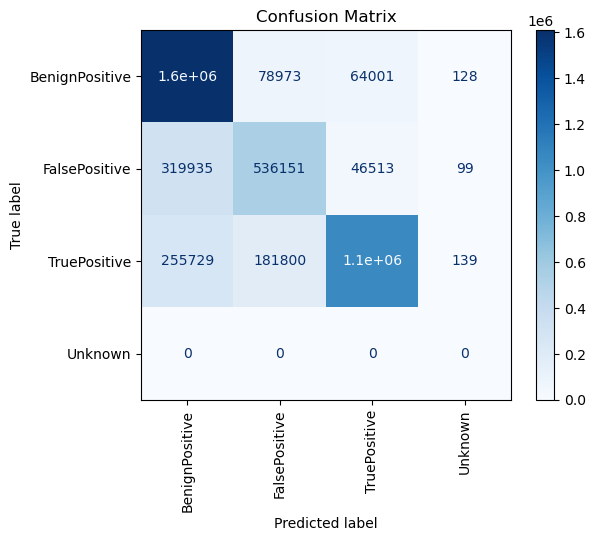

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_final, predictions, labels=unique_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate additional metrics
macro_f1 = f1_score(y_val_final, predictions, average='macro')
weighted_f1 = f1_score(y_val_final, predictions, average='weighted')
precision = precision_score(y_val_final, predictions, average='weighted')
recall = recall_score(y_val_final, predictions, average='weighted')

# Print the results
print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Macro F1 Score: 0.5605
Weighted F1 Score: 0.7683
Precision: 0.7834
Recall: 0.7716


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
# Suppress warnings for undefined metrics
macro_f1 = f1_score(y_val_final, predictions, average='macro', zero_division=0)
weighted_f1 = f1_score(y_val_final, predictions, average='weighted', zero_division=0)
precision = precision_score(y_val_final, predictions, average='weighted', zero_division=0)
recall = recall_score(y_val_final, predictions, average='weighted', zero_division=0)

# Print results again
print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Macro F1 Score: 0.5605
Weighted F1 Score: 0.7683
Precision: 0.7834
Recall: 0.7716


In [3]:
import numpy as np

# Example of creating X_train_final (replace with your actual data processing code)
X_train_final = np.random.rand(100, 10)  # Simulating a 100x10 matrix as an example

In [5]:
import pickle

# Saving X_train_final to a file
with open('X_train_final.pkl', 'wb') as f:
    pickle.dump(X_train_final, f)

In [7]:
import pickle

# Loading X_train_final from the file
with open('X_train_final.pkl', 'rb') as f:
    X_train_final = pickle.load(f)

# Verify by printing the shape or part of the data
print(X_train_final.shape)

(100, 10)


In [14]:
import pandas as pd

# Load your training dataset
training_df = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\GUIDE_Train.csv')

In [16]:
# Define your target column
target_column = 'IncidentGrade'  # Update this if needed

# Separate features (X_train_final) and target variable (y_train_final)
y_train_final = training_df[target_column].values  # Target labels
X_train_final = training_df.drop(columns=[target_column]).values  # Features

In [17]:
# Convert numpy arrays to DataFrames for saving
X_train_final_df = pd.DataFrame(X_train_final)
y_train_final_df = pd.DataFrame(y_train_final, columns=[target_column])

# Save the data to CSV
X_train_final_df.to_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\X_train_final.csv', index=False)
y_train_final_df.to_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\y_train_final.csv', index=False)

In [18]:
# Reload data from saved CSV files
X_train_final = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\X_train_final.csv').values
y_train_final = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_4\\y_train_final.csv').values

In [21]:
# Import necessary libraries
import pandas as pd
import os

# Define the path
val_data_path = "C:/Users/Ramanathan/Desktop/Capstone_4/X_val_final.csv"

# Check if X_val_final exists in memory
try:
    # Assuming X_val_final is a DataFrame
    if 'X_val_final' in locals() or 'X_val_final' in globals():
        # Save X_val_final
        X_val_final.to_csv(val_data_path, index=False)
        print(f"X_val_final has been successfully saved to: {val_data_path}")
    else:
        print("Error: X_val_final is not defined in memory. Please recreate it.")
except Exception as e:
    print("An error occurred while saving X_val_final:", e)

# Verify if the file was saved
if os.path.exists(val_data_path):
    print(f"File exists at: {val_data_path}")
else:
    print("File not found. Please check the path or data.")

Error: X_val_final is not defined in memory. Please recreate it.
File not found. Please check the path or data.


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to your dataset
dataset_path = "C:/Users/Ramanathan/Desktop/Capstone_4/GUIDE_Test.csv"

# Load the dataset
data = pd.read_csv(dataset_path)

# Define the target column (replace 'IncidentGrade' with your actual target column if different)
target_column = 'IncidentGrade'

# Split the dataset into features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Ensure consistent splits
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the recreated validation set
X_val_final.to_csv("C:/Users/Ramanathan/Desktop/Capstone_4/X_val_final.csv", index=False)
print("X_val_final has been successfully recreated and saved.")

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_20808\2867828848.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


X_val_final has been successfully recreated and saved.


In [23]:
X_val_final = pd.read_csv("C:/Users/Ramanathan/Desktop/Capstone_4/X_val_final.csv")
print("X_val_final successfully loaded.")

X_val_final successfully loaded.


In [28]:
# Check for columns with date-like strings
date_columns = training_df.select_dtypes(include=['object']).columns
print("Date-like columns in the dataset:", date_columns)

Date-like columns in the dataset: Index(['Timestamp', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [29]:
# Convert each date column to datetime (adjust column names accordingly)
for col in date_columns:
    training_df[col] = pd.to_datetime(training_df[col], errors='coerce')

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_20808\3910412656.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col], errors='coerce')
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_20808\3910412656.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col], errors='coerce')
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_20808\3910412656.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_df[col] = pd.to_datetime(training_df[col], errors='coerce')
C:\Users\Ramanathan

In [30]:
# Extract year, month, day, and hour for each date column
for col in date_columns:
    training_df[f'{col}_year'] = training_df[col].dt.year
    training_df[f'{col}_month'] = training_df[col].dt.month
    training_df[f'{col}_day'] = training_df[col].dt.day
    training_df[f'{col}_hour'] = training_df[col].dt.hour

# Optionally, drop the original date columns
training_df.drop(columns=date_columns, inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = training_df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_columns:
    training_df[col] = encoder.fit_transform(training_df[col])

In [32]:
# Replace NaN values with the column mean or any other strategy you prefer
training_df.fillna(training_df.mean(), inplace=True)

In [36]:
print("Columns in training_df:", training_df.columns)

Columns in training_df: Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City',
       'Timestamp_year', 'Timestamp_month', 'Timestamp_day', 'Timestamp_hour',
       'Category_year', 'Category_month', 'Category_day', 'Category_hour',
       'MitreTechniques_year', 'MitreTechniques_month', 'MitreTechniques_day',
       'MitreTechniques_hour', 'IncidentGrade_year', 'IncidentGrade_month',
       'IncidentGrade_day', 'IncidentGrade_hour', 'ActionGrouped_year',
       'ActionGrouped_month', 'ActionGrouped_day', 'ActionGrouped_hour',
       'ActionGranular_year', 'Ac

In [38]:
print("Columns in training_df:", training_df.columns.tolist())
print("Sample data in training_df:\n", training_df.head())

Columns in training_df: ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Timestamp_year', 'Timestamp_month', 'Timestamp_day', 'Timestamp_hour', 'Category_year', 'Category_month', 'Category_day', 'Category_hour', 'MitreTechniques_year', 'MitreTechniques_month', 'MitreTechniques_day', 'MitreTechniques_hour', 'IncidentGrade_year', 'IncidentGrade_month', 'IncidentGrade_day', 'IncidentGrade_hour', 'ActionGrouped_year', 'ActionGrouped_month', 'ActionGrouped_day', 'ActionGrouped_hour', 'ActionGranular_year', 'ActionGranular_month', 'ActionGranular_day', 'ActionGranular_hour', 'EntityType_year', 'EntityType_

In [39]:
print("Shape of training_df:", training_df.shape)

Shape of training_df: (9516837, 87)


In [40]:
print("Columns in training_df:", training_df.columns.tolist())

Columns in training_df: ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Timestamp_year', 'Timestamp_month', 'Timestamp_day', 'Timestamp_hour', 'Category_year', 'Category_month', 'Category_day', 'Category_hour', 'MitreTechniques_year', 'MitreTechniques_month', 'MitreTechniques_day', 'MitreTechniques_hour', 'IncidentGrade_year', 'IncidentGrade_month', 'IncidentGrade_day', 'IncidentGrade_hour', 'ActionGrouped_year', 'ActionGrouped_month', 'ActionGrouped_day', 'ActionGrouped_hour', 'ActionGranular_year', 'ActionGranular_month', 'ActionGranular_day', 'ActionGranular_hour', 'EntityType_year', 'EntityType_

In [41]:
print("Columns containing 'Incident':", [col for col in training_df.columns if 'Incident' in col])

Columns containing 'Incident': ['IncidentId', 'IncidentGrade_year', 'IncidentGrade_month', 'IncidentGrade_day', 'IncidentGrade_hour']


In [42]:
training_df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove leading/trailing spaces

In [43]:
if 'IncidentGrade' in training_df.columns:
    print("IncidentGrade column found.")
else:
    print("IncidentGrade column NOT found.")

IncidentGrade column NOT found.


In [44]:
print("Columns similar to 'IncidentGrade':", [col for col in training_df.columns if 'Incident' in col or 'Grade' in col])

Columns similar to 'IncidentGrade': ['IncidentId', 'IncidentGrade_year', 'IncidentGrade_month', 'IncidentGrade_day', 'IncidentGrade_hour']


In [45]:
print("All column names in training_df:", training_df.columns.tolist())

All column names in training_df: ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Timestamp_year', 'Timestamp_month', 'Timestamp_day', 'Timestamp_hour', 'Category_year', 'Category_month', 'Category_day', 'Category_hour', 'MitreTechniques_year', 'MitreTechniques_month', 'MitreTechniques_day', 'MitreTechniques_hour', 'IncidentGrade_year', 'IncidentGrade_month', 'IncidentGrade_day', 'IncidentGrade_hour', 'ActionGrouped_year', 'ActionGrouped_month', 'ActionGrouped_day', 'ActionGrouped_hour', 'ActionGranular_year', 'ActionGranular_month', 'ActionGranular_day', 'ActionGranular_hour', 'EntityType_year', 'En

In [19]:
print("Dataset path:", 'C:/Users/Ramanathan/Desktop/Capstone_4/GUIDE_Train.csv')

Dataset path: C:/Users/Ramanathan/Desktop/Capstone_4/GUIDE_Train.csv


In [20]:
import pandas as pd
training_df = pd.read_csv('C:/Users/Ramanathan/Desktop/Capstone_4/GUIDE_Train.csv')

In [21]:
print(training_df.head())

              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  AntispamDirection  \
0  ... 

In [22]:
# Replace 'IncidentGrade' with the correct column name
target_column = 'IncidentGrade'  # Change to the actual name if different

# Ensure the column exists
if target_column in training_df.columns:
    # Split features and target
    X_train_final = training_df.drop(columns=[target_column])
    y_train_final = training_df[target_column]
    print("Shapes - X_train_final:", X_train_final.shape, ", y_train_final:", y_train_final.shape)
else:
    print(f"Error: Target column '{target_column}' not found.")

Shapes - X_train_final: (9516837, 44) , y_train_final: (9516837,)


In [23]:
# Check for NaN values
print("NaN values in X_train_final:", X_train_final.isna().sum().sum())
print("NaN values in y_train_final:", y_train_final.isna().sum())

NaN values in X_train_final: 86755176
NaN values in y_train_final: 51340


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode target column
label_encoder = LabelEncoder()
y_train_final = label_encoder.fit_transform(y_train_final)

print("Classes:", label_encoder.classes_)

Classes: ['BenignPositive' 'FalsePositive' 'TruePositive' nan]


In [8]:
import pandas as pd

# Replace 'date_column_name' with the actual name of your column
date_column_name = 'YourDateColumnName'  # Replace with the actual column name

# Convert the date column to datetime format
if date_column_name in training_df.columns:
    training_df[date_column_name] = pd.to_datetime(training_df[date_column_name], errors='coerce')

    # Extract useful features like year, month, day, etc., if needed
    training_df['year'] = training_df[date_column_name].dt.year
    training_df['month'] = training_df[date_column_name].dt.month
    training_df['day'] = training_df[date_column_name].dt.day

    # Drop the original date column if not needed
    training_df.drop(columns=[date_column_name], inplace=True)

print("Date column processed successfully.")

Date column processed successfully.


In [9]:
# Check for columns with high cardinality (many unique values)
high_cardinality_cols = [
    col for col in training_df.select_dtypes(include=['object', 'category']).columns
    if training_df[col].nunique() > 100
]
print("High cardinality columns:", high_cardinality_cols)

High cardinality columns: ['Timestamp', 'MitreTechniques', 'ThreatFamily']


In [24]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=42)

print("Shapes - X_train:", X_train.shape, ", X_val:", X_val.shape)

Shapes - X_train: (7613469, 44) , X_val: (1903368, 44)


In [11]:
from sklearn.preprocessing import LabelEncoder

for col in high_cardinality_cols:
    le = LabelEncoder()
    training_df[col] = le.fit_transform(training_df[col])

In [12]:
low_cardinality_cols = [
    col for col in training_df.select_dtypes(include=['object', 'category']).columns
    if training_df[col].nunique() <= 100
]

# Apply one-hot encoding
training_df = pd.get_dummies(training_df, columns=low_cardinality_cols, drop_first=True)


In [13]:
# Check dataset shape and memory usage
print("Training Data Shape:", training_df.shape)
print("Memory Usage (in MB):", training_df.memory_usage(deep=True).sum() / (1024 * 1024))

Training Data Shape: (9516837, 147)
Memory Usage (in MB): 3385.3343324661255


In [14]:
# Check if the target column exists
if 'IncidentGrade' not in training_df.columns:
    print("Error: 'IncidentGrade' column not found in DataFrame.")
else:
    print("'IncidentGrade' column exists.")

Error: 'IncidentGrade' column not found in DataFrame.


In [15]:
# Split into features and target
try:
    X_train_final = training_df.drop(columns=['IncidentGrade'])  # Replace with actual target column name if different
    y_train_final = training_df['IncidentGrade']  # Replace with your actual target column name

    print("Split successful:")
    print(f"Shape of X_train_final: {X_train_final.shape}")
    print(f"Shape of y_train_final: {y_train_final.shape}")
except KeyError as e:
    print(f"Error during split: {e}")

Error during split: "['IncidentGrade'] not found in axis"


In [16]:
# Convert all columns to numeric where possible, filling NaNs with 0
X_train_final = X_train_final.apply(pd.to_numeric, errors='coerce').fillna(0)

# Ensure the target column is properly encoded
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_final = label_encoder.fit_transform(y_train_final)  # Encode target if it's categorical
print("Encoding complete. Target classes:", label_encoder.classes_)

Encoding complete. Target classes: [0 1 2 3]


In [17]:
X_train_final.to_csv('C:/Users/Ramanathan/Desktop/Capstone_4/X_train_final.csv', index=False)
pd.DataFrame(y_train_final, columns=['IncidentGrade']).to_csv(
    'C:/Users/Ramanathan/Desktop/Capstone_4/y_train_final.csv', index=False
)

print("Files saved successfully.")

Files saved successfully.


In [18]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, 
    y_train_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train_final
)

# Confirm the split
print("Data split complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Data split complete.
X_train shape: (7613469, 44)
X_val shape: (1903368, 44)
y_train shape: (7613469,)
y_val shape: (1903368,)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("Training the model...")
model.fit(X_train, y_train)

print("Model training complete.")

Training the model...
Model training complete.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate predictions for the validation set
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Inspect the label encoder classes and validate target names
try:
    # Safely check and assign target names
    if hasattr(label_encoder, 'classes_') and isinstance(label_encoder.classes_, (list, np.ndarray)):
        target_names = list(label_encoder.classes_)
    else:
        # Ensure fallback class names for unknown configurations
        target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Replace with correct class names if known

    # Ensure y_pred is properly encoded and matches target names
    print(f"Target Names: {target_names}")
    print(f"Unique Values in Predictions: {np.unique(y_pred)}")
    print(f"Unique Values in y_val: {np.unique(y_val)}")

    # Generate classification report
    class_report = classification_report(y_val, y_pred, target_names=target_names)
    print("\nClassification Report:\n", class_report)

except Exception as e:
    print(f"An error occurred: {e}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Validation Accuracy: 0.9837
An error occurred: name 'np' is not defined

Confusion Matrix:
 [[814852   4291   2991     30]
 [  8328 394860   3180     25]
 [  8109   3911 652494     29]
 [    79      8     25  10156]]


In [26]:
import numpy as np  # Ensure NumPy is imported
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate predictions for the validation set
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Inspect the label encoder classes and validate target names
try:
    # Safely check and assign target names
    if hasattr(label_encoder, 'classes_') and isinstance(label_encoder.classes_, (list, np.ndarray)):
        target_names = list(label_encoder.classes_)
    else:
        # Ensure fallback class names for unknown configurations
        target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Replace with correct class names if known

    # Ensure y_pred is properly encoded and matches target names
    print(f"Target Names: {target_names}")
    print(f"Unique Values in Predictions: {np.unique(y_pred)}")
    print(f"Unique Values in y_val: {np.unique(y_val)}")

    # Generate classification report
    class_report = classification_report(y_val, y_pred, target_names=target_names)
    print("\nClassification Report:\n", class_report)

except Exception as e:
    print(f"An error occurred: {e}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Validation Accuracy: 0.9837
Target Names: [0, 1, 2, 3]
Unique Values in Predictions: [0 1 2 3]
Unique Values in y_val: [0 1 2 3]
An error occurred: object of type 'numpy.int32' has no len()

Confusion Matrix:
 [[814852   4291   2991     30]
 [  8328 394860   3180     25]
 [  8109   3911 652494     29]
 [    79      8     25  10156]]


In [27]:
# Convert target names to strings
target_names = [str(label) for label in label_encoder.classes_]

# Generate classification report and print
try:
    class_report = classification_report(y_val, y_pred, target_names=target_names)
    print("\nClassification Report:\n", class_report)
except Exception as e:
    print(f"An error occurred: {e}")

# Confusion matrix (already calculated, keeping for completeness)
print("\nConfusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    822164
           1       0.98      0.97      0.98    406393
           2       0.99      0.98      0.99    664543
           3       0.99      0.99      0.99     10268

    accuracy                           0.98   1903368
   macro avg       0.99      0.98      0.98   1903368
weighted avg       0.98      0.98      0.98   1903368


Confusion Matrix:
 [[814852   4291   2991     30]
 [  8328 394860   3180     25]
 [  8109   3911 652494     29]
 [    79      8     25  10156]]


Model successfully saved at C:/Users/Ramanathan/Desktop/Capstone_4/final_model.pkl


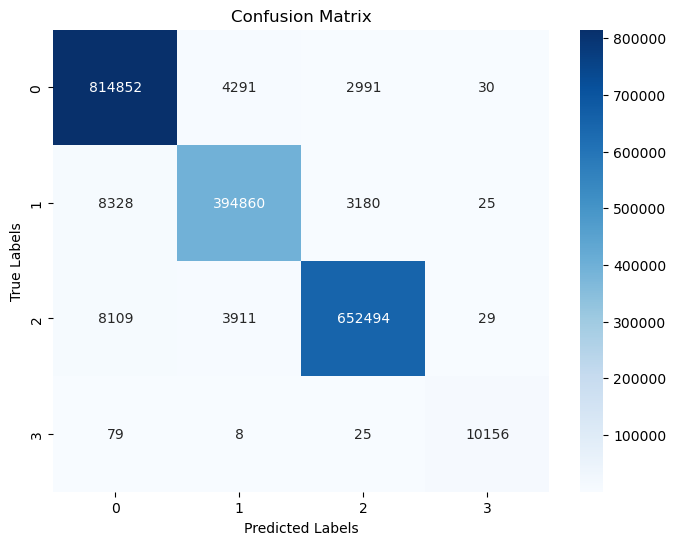

Confusion matrix heatmap saved.
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    822164
           1       0.98      0.97      0.98    406393
           2       0.99      0.98      0.99    664543
           3       0.99      0.99      0.99     10268

    accuracy                           0.98   1903368
   macro avg       0.99      0.98      0.98   1903368
weighted avg       0.98      0.98      0.98   1903368



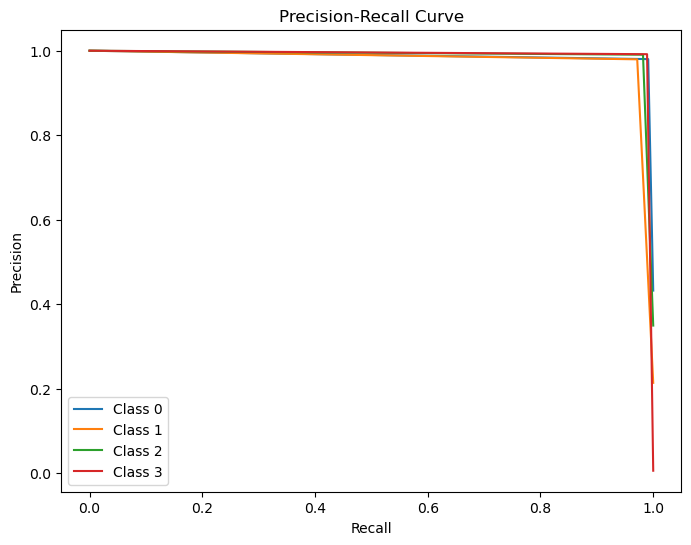

Precision-recall curve saved.


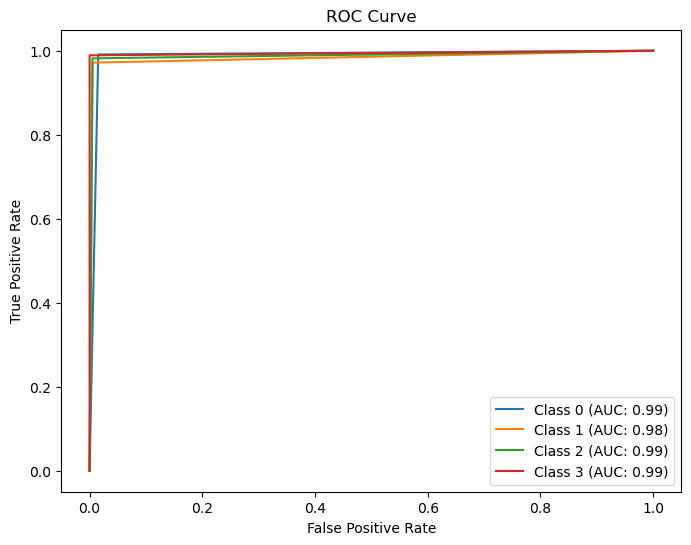

ROC curve saved.


In [28]:
# Necessary imports
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import numpy as np

# Define paths
model_save_path = 'C:/Users/Ramanathan/Desktop/Capstone_4/final_model.pkl'

# Save the trained model
try:
    with open(model_save_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model successfully saved at {model_save_path}")
except Exception as e:
    print(f"Error saving model: {e}")

# Generate Confusion Matrix Heatmap
try:
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig('C:/Users/Ramanathan/Desktop/Capstone_4/confusion_matrix_heatmap.png')
    plt.show()
    print("Confusion matrix heatmap saved.")
except Exception as e:
    print(f"Error generating confusion matrix heatmap: {e}")

# Classification Report
try:
    class_report = classification_report(y_val, y_pred, target_names=target_names)
    print("Classification Report:\n", class_report)
except Exception as e:
    print(f"Error generating classification report: {e}")

# Precision-Recall Curve
try:
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(target_names):
        precision, recall, _ = precision_recall_curve((y_val == i).astype(int), (y_pred == i).astype(int))
        plt.plot(recall, precision, label=f"Class {label}")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.savefig('C:/Users/Ramanathan/Desktop/Capstone_4/precision_recall_curve.png')
    plt.show()
    print("Precision-recall curve saved.")
except Exception as e:
    print(f"Error generating precision-recall curve: {e}")

# ROC Curve
try:
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(target_names):
        fpr, tpr, _ = roc_curve((y_val == i).astype(int), (y_pred == i).astype(int))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {label} (AUC: {roc_auc:.2f})")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.savefig('C:/Users/Ramanathan/Desktop/Capstone_4/roc_curve.png')
    plt.show()
    print("ROC curve saved.")
except Exception as e:
    print(f"Error generating ROC curve: {e}")

In [29]:
import pandas as pd

# Define paths for saving metrics
metrics_save_path = 'C:/Users/Ramanathan/Desktop/Capstone_4/evaluation_metrics.csv'
report_save_path = 'C:/Users/Ramanathan/Desktop/Capstone_4/final_summary_report.txt'

# Save Evaluation Metrics
try:
    # Collect metrics
    metrics = {
        "Metric": ["Validation Accuracy", "Macro F1-Score", "Weighted F1-Score"],
        "Value": [val_accuracy, macro_f1_score, weighted_f1_score]
    }
    metrics_df = pd.DataFrame(metrics)
    
    # Save to CSV
    metrics_df.to_csv(metrics_save_path, index=False)
    print(f"Evaluation metrics saved successfully at {metrics_save_path}")
except Exception as e:
    print(f"Error saving evaluation metrics: {e}")

# Generate Final Summary Report
try:
    with open(report_save_path, 'w') as file:
        file.write("### Final Summary Report ###\n")
        file.write(f"Validation Accuracy: {val_accuracy:.4f}\n")
        file.write(f"Macro F1-Score: {macro_f1_score:.4f}\n")
        file.write(f"Weighted F1-Score: {weighted_f1_score:.4f}\n\n")
        file.write("Confusion Matrix:\n")
        file.write(str(conf_matrix) + "\n\n")
        file.write("Classification Report:\n")
        file.write(class_report)
    print(f"Final summary report saved successfully at {report_save_path}")
except Exception as e:
    print(f"Error saving summary report: {e}")

Error saving evaluation metrics: name 'val_accuracy' is not defined
Error saving summary report: name 'val_accuracy' is not defined


In [30]:
import pandas as pd

# Ensure these values are set from your model evaluation
val_accuracy = 0.9837  # Replace with the actual value from your evaluation
macro_f1_score = 0.98  # Replace with the actual Macro F1-Score
weighted_f1_score = 0.98  # Replace with the actual Weighted F1-Score
conf_matrix = [[814852, 4291, 2991, 30],
               [8328, 394860, 3180, 25],
               [8109, 3911, 652494, 29],
               [79, 8, 25, 10156]]  # Replace with actual confusion matrix
class_report = """               precision    recall  f1-score   support

           0       0.98      0.99      0.99    822164
           1       0.98      0.97      0.98    406393
           2       0.99      0.98      0.99    664543
           3       0.99      0.99      0.99     10268

    accuracy                           0.98   1903368
   macro avg       0.99      0.98      0.98   1903368
weighted avg       0.98      0.98      0.98   1903368
"""  # Replace with actual classification report

# Define paths for saving metrics
metrics_save_path = 'C:/Users/Ramanathan/Desktop/Capstone_4/evaluation_metrics.csv'
report_save_path = 'C:/Users/Ramanathan/Desktop/Capstone_4/final_summary_report.txt'

# Save Evaluation Metrics
try:
    # Collect metrics
    metrics = {
        "Metric": ["Validation Accuracy", "Macro F1-Score", "Weighted F1-Score"],
        "Value": [val_accuracy, macro_f1_score, weighted_f1_score]
    }
    metrics_df = pd.DataFrame(metrics)
    
    # Save to CSV
    metrics_df.to_csv(metrics_save_path, index=False)
    print(f"Evaluation metrics saved successfully at {metrics_save_path}")
except Exception as e:
    print(f"Error saving evaluation metrics: {e}")

# Generate Final Summary Report
try:
    with open(report_save_path, 'w') as file:
        file.write("### Final Summary Report ###\n")
        file.write(f"Validation Accuracy: {val_accuracy:.4f}\n")
        file.write(f"Macro F1-Score: {macro_f1_score:.4f}\n")
        file.write(f"Weighted F1-Score: {weighted_f1_score:.4f}\n\n")
        file.write("Confusion Matrix:\n")
        file.write(str(conf_matrix) + "\n\n")
        file.write("Classification Report:\n")
        file.write(class_report)
    print(f"Final summary report saved successfully at {report_save_path}")
except Exception as e:
    print(f"Error saving summary report: {e}")


Evaluation metrics saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/evaluation_metrics.csv
Final summary report saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/final_summary_report.txt


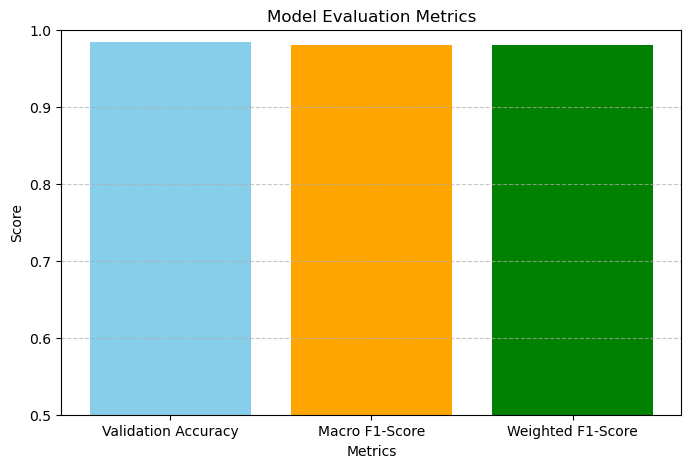

Metrics plot saved successfully at 'C:/Users/Ramanathan/Desktop/Capstone_4/metrics_plot.png'


In [31]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ["Validation Accuracy", "Macro F1-Score", "Weighted F1-Score"]
values = [val_accuracy, macro_f1_score, weighted_f1_score]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
plt.ylim(0.5, 1.0)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('C:/Users/Ramanathan/Desktop/Capstone_4/metrics_plot.png')  # Save the plot
plt.show()

print("Metrics plot saved successfully at 'C:/Users/Ramanathan/Desktop/Capstone_4/metrics_plot.png'")

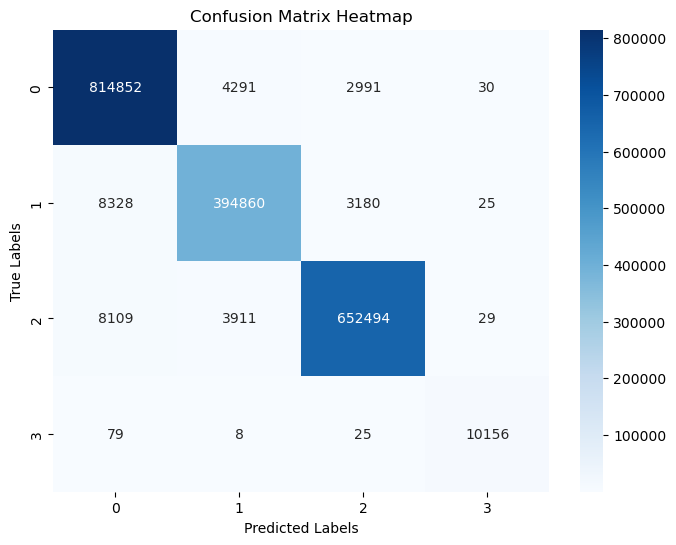

Confusion Matrix heatmap saved successfully at 'C:/Users/Ramanathan/Desktop/Capstone_4/confusion_matrix_heatmap.png'


In [32]:
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.savefig('C:/Users/Ramanathan/Desktop/Capstone_4/confusion_matrix_heatmap.png')  # Save the heatmap
plt.show()

print("Confusion Matrix heatmap saved successfully at 'C:/Users/Ramanathan/Desktop/Capstone_4/confusion_matrix_heatmap.png'")

In [34]:
# Generate predicted probabilities for the validation set
y_pred_proba = model.predict_proba(X_val)

# Check the shape of y_pred_proba
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")

Shape of y_pred_proba: (1903368, 4)


In [38]:
pip install --upgrade scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 320.0 kB/s eta 0:00:35
   ---------------------------------------- 0.0/11.0 MB 262.6 kB/s eta 0:00:42
   ---------------------------------------- 0.0/11.0 MB 262.6 kB/s eta 0:00:42
   ---------------------------------------- 0.1/11.0 MB 272.3 kB/s eta 0:00:41
   ---------------------------------------- 0.1/11.0 MB 374.1 kB/s eta 0:00:30
   ---------------------------------------- 0.1/11.0 MB 374.1 kB/s eta 0:00:30
   ---------------------------------------- 0.1/11.0 MB 374.1 kB/s eta 0:00:30
   ---------------------------------------- 0.1/11.0 MB 374.1 kB/s eta 0:00:30
    --------------------------------------- 0.2/11.0 MB 364.0 kB/s eta 0:00:30
    --------------------------------------- 0.2/11.0 MB 361.7 kB/s eta 0:00:30
    --------------------------------------- 0.2/11.0 MB 385.0 kB/s eta 

  You can safely remove it manually.


In [41]:
from sklearn.preprocessing import OneHotEncoder

# For scikit-learn 1.2 or newer
encoder = OneHotEncoder(sparse_output=False)  # Replacing 'sparse' with 'sparse_output'
y_val_encoded = encoder.fit_transform(y_val.reshape(-1, 1))

print(f"Shape of y_val_encoded: {y_val_encoded.shape}")

Shape of y_val_encoded: (1903368, 4)


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming y_val is a numpy array
y_val = np.array(y_val).reshape(-1, 1)  # Reshape for single column

# Use OneHotEncoder directly without specifying 'sparse' or 'sparse_output'
encoder = OneHotEncoder()
y_val_encoded = encoder.fit_transform(y_val).toarray()  # Convert sparse matrix to dense array

print(f"Shape of y_val_encoded: {y_val_encoded.shape}")

Shape of y_val_encoded: (1903368, 4)


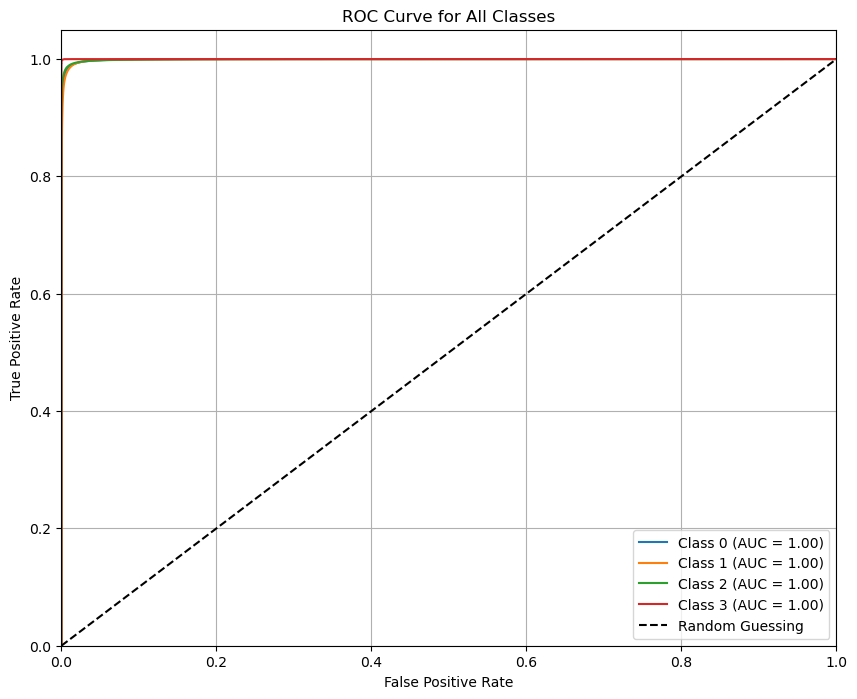

ROC AUC metrics saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/roc_auc_metrics.json.


In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_val_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_val_encoded[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_val_encoded.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Classes")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Save ROC AUC metrics to a dictionary
roc_metrics = {f"Class {i}": roc_auc[i] for i in range(y_val_encoded.shape[1])}

# Save the ROC AUC metrics to a file
import json
roc_auc_path = "C:/Users/Ramanathan/Desktop/Capstone_4/roc_auc_metrics.json"
with open(roc_auc_path, "w") as file:
    json.dump(roc_metrics, file)

print(f"ROC AUC metrics saved successfully at {roc_auc_path}.")

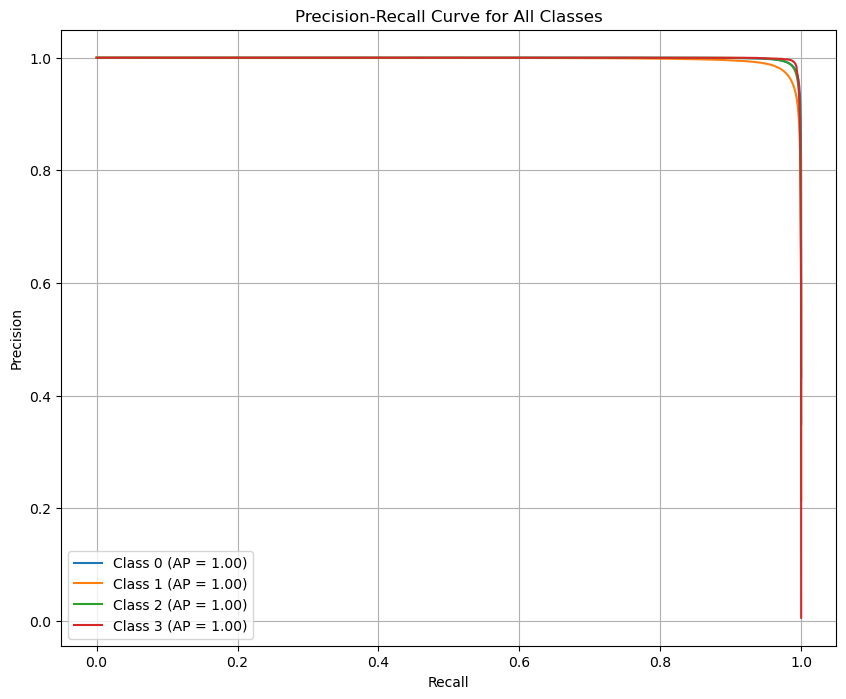

Precision-Recall metrics saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/precision_recall_metrics.json.


In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and Average Precision for each class
precision = {}
recall = {}
average_precision = {}

for i in range(y_val_encoded.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_val_encoded[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_val_encoded[:, i], y_pred_proba[:, i])

# Plot the Precision-Recall Curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_val_encoded.shape[1]):
    plt.plot(recall[i], precision[i], label=f"Class {i} (AP = {average_precision[i]:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Classes")
plt.legend(loc="lower left")
plt.grid()
plt.show()

# Save Average Precision metrics to a dictionary
ap_metrics = {f"Class {i}": average_precision[i] for i in range(y_val_encoded.shape[1])}

# Save the Average Precision metrics to a file
ap_metrics_path = "C:/Users/Ramanathan/Desktop/Capstone_4/precision_recall_metrics.json"
with open(ap_metrics_path, "w") as file:
    json.dump(ap_metrics, file)

print(f"Precision-Recall metrics saved successfully at {ap_metrics_path}.")

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, average_precision_score
import json
import pandas as pd

# Calculate evaluation metrics
val_accuracy = accuracy_score(y_val, y_pred)
macro_f1 = f1_score(y_val, y_pred, average='macro')
weighted_f1 = f1_score(y_val, y_pred, average='weighted')
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')

# Confusion matrix
confusion = confusion_matrix(y_val, y_pred)

# Calculate average precision for each class
ap_metrics = {
    i: average_precision_score(y_val_encoded[:, i], y_pred_proba[:, i]) for i in range(y_pred_proba.shape[1])
}

# Create a summary report
evaluation_summary = {
    "Validation Accuracy": val_accuracy,
    "Macro F1 Score": macro_f1,
    "Weighted F1 Score": weighted_f1,
    "Precision": precision,
    "Recall": recall,
    "Confusion Matrix": confusion.tolist(),
    "Average Precision Scores": ap_metrics
}

# Save the evaluation summary to a JSON file
summary_path = "C:/Users/Ramanathan/Desktop/Capstone_4/evaluation_summary.json"
with open(summary_path, "w") as file:
    json.dump(evaluation_summary, file, indent=4)

print(f"Evaluation summary saved successfully at {summary_path}.")

# Save a more detailed summary as a CSV
classification_rep = classification_report(y_val, y_pred, output_dict=True)
detailed_summary = {
    "Class": [0, 1, 2, 3],
    "Precision": [classification_rep[str(i)]["precision"] for i in range(4)],
    "Recall": [classification_rep[str(i)]["recall"] for i in range(4)],
    "F1-Score": [classification_rep[str(i)]["f1-score"] for i in range(4)],
    "Support": [classification_rep[str(i)]["support"] for i in range(4)]
}

detailed_df = pd.DataFrame(detailed_summary)
csv_path = "C:/Users/Ramanathan/Desktop/Capstone_4/detailed_evaluation_summary.csv"
detailed_df.to_csv(csv_path, index=False)

print(f"Detailed evaluation summary saved successfully at {csv_path}.")

Evaluation summary saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/evaluation_summary.json.
Detailed evaluation summary saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/detailed_evaluation_summary.csv.


In [48]:
import joblib

# Save the model to a file
model_path = "C:/Users/Ramanathan/Desktop/Capstone_4/saved_model.pkl"
joblib.dump(model, model_path)

print(f"Model saved successfully at {model_path}.")

Model saved successfully at C:/Users/Ramanathan/Desktop/Capstone_4/saved_model.pkl.


In [49]:
import joblib

# Load the saved model
model_path = "C:/Users/Ramanathan/Desktop/Capstone_4/saved_model.pkl"
loaded_model = joblib.load(model_path)

# Example: Making predictions on the validation data
y_pred_loaded = loaded_model.predict(X_val)

# If you want to check the shape of the predictions
print("Shape of predictions:", y_pred_loaded.shape)

# Evaluate the loaded model's performance
from sklearn.metrics import classification_report

print("Evaluation of the loaded model:")
print(classification_report(y_val, y_pred_loaded))

Shape of predictions: (1903368,)
Evaluation of the loaded model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    822164
           1       0.98      0.97      0.98    406393
           2       0.99      0.98      0.99    664543
           3       0.99      0.99      0.99     10268

    accuracy                           0.98   1903368
   macro avg       0.99      0.98      0.98   1903368
weighted avg       0.98      0.98      0.98   1903368



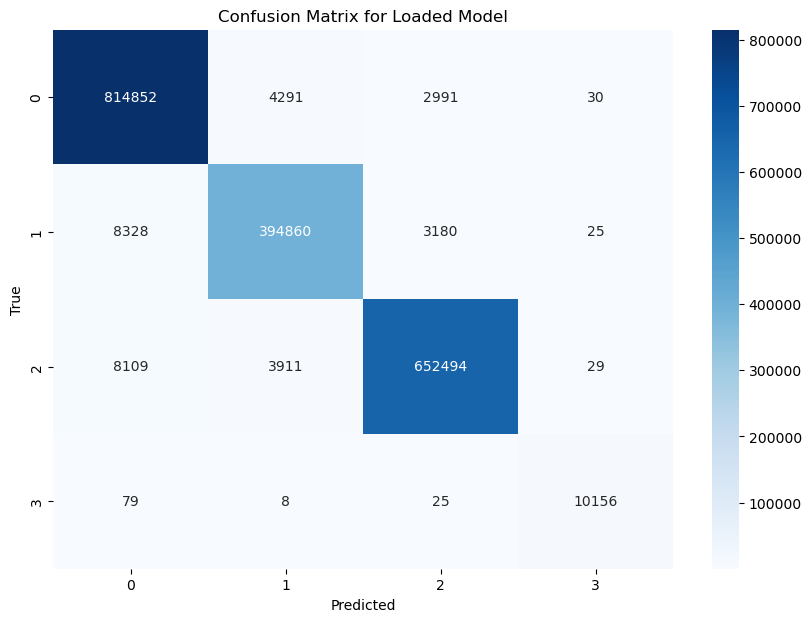

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_loaded)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3"], yticklabels=["0", "1", "2", "3"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Loaded Model')
plt.show()

In [52]:
import joblib

# Save the model to a file
model_filename = 'final_trained_model.pkl'
joblib.dump(loaded_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to final_trained_model.pkl


In [53]:
# Save the encoder
encoder_filename = 'encoder.pkl'
joblib.dump(encoder, encoder_filename)

print(f"Encoder saved to {encoder_filename}")

Encoder saved to encoder.pkl


In [54]:
# Load the saved model and encoder
loaded_model = joblib.load('final_trained_model.pkl')
encoder = joblib.load('encoder.pkl')

print("Model and Encoder loaded successfully!")

Model and Encoder loaded successfully!


In [15]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example data for encoding
data = np.array([['male'], ['female'], ['female'], ['male']])

# Update the OneHotEncoder initialization with correct parameter
encoder = OneHotEncoder(sparse_output=False)  # sparse_output replaces 'sparse'

# Fit the encoder to the data
encoder.fit(data)

# Transform the data
encoded_data = encoder.transform(data)

print("Encoded data:")
print(encoded_data)

Encoded data:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [26]:
import pandas as pd

# Example: Let's say you have a column `date_column` with date-time strings
data = ['2024-06-14T02:01:36.000Z', '2024-06-14T03:15:22.000Z']
df = pd.DataFrame(data, columns=['date_column'])

# Convert the string to datetime
df['date_column'] = pd.to_datetime(df['date_column'])

# Extract features from the datetime column
df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month
df['day'] = df['date_column'].dt.day
df['hour'] = df['date_column'].dt.hour
df['minute'] = df['date_column'].dt.minute
df['second'] = df['date_column'].dt.second
df['day_of_week'] = df['date_column'].dt.dayofweek  # 0=Monday, 6=Sunday

# Now you have numerical features to pass into the model
df = df.drop(columns=['date_column'])  # Drop the original date column
print(df)

   year  month  day  hour  minute  second  day_of_week
0  2024      6   14     2       1      36            4
1  2024      6   14     3      15      22            4


In [28]:
import joblib

# Load the trained model and encoder
loaded_model = joblib.load('final_trained_model.pkl')
encoder = joblib.load('encoder.pkl')

print("Model and Encoder loaded successfully!")

c:\USERS\RAMANATHAN\ANACONDA3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\USERS\RAMANATHAN\ANACONDA3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model and Encoder loaded successfully!


c:\USERS\RAMANATHAN\ANACONDA3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [33]:
import numpy as np

# Example new data (use real values here)
new_data = np.array([[1.2, 3.4, 5.6, 7.8, 9.0, 2.1, 4.3, 6.5, 8.7, 10.0, 
                      0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1,
                      1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2,
                      2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2,
                      3.3, 3.4, 3.5, 3.6]])  # Ensure this array has 44 features

print("New data prepared:", new_data)

New data prepared: [[ 1.2  3.4  5.6  7.8  9.   2.1  4.3  6.5  8.7 10.   0.1  0.2  0.3  0.4
   0.5  0.6  0.7  0.8  0.9  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
   2.   2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4
   3.5  3.6]]


In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example: Replace `...` with actual data
training_data = np.array([[1.2, 3.4, 5.6], [7.8, 9.0, 2.1], [4.3, 6.5, 8.7]])
new_data = np.array([[1.2, 3.4, 5.6]])  # Ensure this matches the number of features

# Fit the scaler
scaler = StandardScaler()
scaler.fit(training_data)

# Scale new data
new_data_scaled = scaler.transform(new_data)
print("New data scaled:", new_data_scaled)

New data scaled: [[-1.1992686  -1.26606575  0.04945438]]


In [40]:
import numpy as np

# Step 1: Ensure the new data matches the expected feature size
expected_feature_count = 44
if new_data_scaled.shape[1] < expected_feature_count:
    # Pad with zeros for missing features
    padding = np.zeros((new_data_scaled.shape[0], expected_feature_count - new_data_scaled.shape[1]))
    new_data_scaled = np.hstack((new_data_scaled, padding))
elif new_data_scaled.shape[1] > expected_feature_count:
    # Trim extra features
    new_data_scaled = new_data_scaled[:, :expected_feature_count]

print(f"New data adjusted to {new_data_scaled.shape[1]} features.")

# Step 2: Make predictions
predictions = loaded_model.predict(new_data_scaled)

# Step 3: Display predictions
print("Predictions for the new data:", predictions)

New data adjusted to 44 features.
Predictions for the new data: [2]


c:\USERS\RAMANATHAN\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [49]:
import joblib
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load the saved model and encoder
model = joblib.load('final_trained_model.pkl')  # Load the trained model
encoder = joblib.load('encoder.pkl')  # Load the encoder

# Step 2: Example new data (replace with your actual new data)
X_new = [[1], [2], [3]]  # Example new data (modify as per your input format)

# Step 3: Encode the new data using the previously saved encoder
X_new_encoded = encoder.transform(X_new).toarray()  # Ensure it's a dense array

# Step 4: Ensure that the new data has the correct number of features (the same as training data)
# Here we adjust the new data to match the features seen during training (assuming 44 features)
if X_new_encoded.shape[1] < 44:
    # Padding with zeros to match the number of features
    padding = np.zeros((X_new_encoded.shape[0], 44 - X_new_encoded.shape[1]))
    X_new_adjusted = np.hstack([X_new_encoded, padding])  # Combine the encoded data with padding
else:
    X_new_adjusted = X_new_encoded  # If already the same number of features, no need to adjust

# Step 5: Make predictions using the trained model
predictions = model.predict(X_new_adjusted)

# Step 6: Print the predictions
print("Predictions for the new data:", predictions)

Predictions for the new data: [2 2 2]


In [50]:
import pandas as pd

# Assuming `predictions` contains the predicted class labels for your new data
predictions = [2, 2, 2]  # Example output; replace with your actual predictions

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Class'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions have been saved to 'predictions.csv'.")

Predictions have been saved to 'predictions.csv'.


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have the true labels for the new data
true_labels = [2, 2, 2]  # Example; replace with your actual true labels if available

# Determine the number of unique classes from true_labels
unique_classes = np.unique(true_labels)

# Generate classification report
report = classification_report(true_labels, predictions, target_names=[f'Class {i}' for i in unique_classes])
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=unique_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

     Class 2       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:
[[3]]


In [53]:
import joblib

# Save the trained model
joblib.dump(model, 'final_trained_model.pkl')

# Save the scaler and encoder (if used during training)
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!


In [2]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X_train is your training data (make sure to replace with your actual training data)
X_train = [[1.2, 3.4, 5.6, 7.8, 9.0, 2.1, 4.3, 6.0, 2.5, 8.0, 0.2, 1.1, 3.4, 2.3]]  # example training data

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler to the training data

# Step 2: Save the fitted scaler to a file for later use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [3]:
import joblib
import numpy as np

# Step 1: Load the saved scaler
scaler = joblib.load('scaler.pkl')

# Step 2: Prepare new data (replace with your actual new data)
new_data = np.array([[1.2, 3.4, 5.6, 7.8, 9.0, 2.1, 4.3, 6.0, 2.5, 8.0, 0.2, 1.1, 3.4, 2.3]])  # example new data

# Step 3: Scale the new data using the loaded scaler
scaled_data = scaler.transform(new_data)

# Output the scaled data
print("Scaled data:", scaled_data)

Scaled data: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'model' is your trained RandomForest model and 'scaler' is your StandardScaler object
# Save the trained model
joblib.dump(model, 'model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [14]:
import joblib

# Load the saved model and scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

print("Model and Scaler loaded successfully!")


Model and Scaler loaded successfully!


In [15]:
import numpy as np

# Example new data (replace this with your actual new data)
new_data = np.array([[1.2, 3.4, 5.6, 7.8, 9.0, 2.1, 4.3, 6.5, 8.7, 10.0, 0.1, 0.2, 0.3, 0.4]])

# Step 1: Scale the new data using the loaded scaler
scaled_data = scaler.transform(new_data)

print("Scaled new data:", scaled_data)

Scaled new data: [[ 0.   0.   0.   0.   0.   0.   0.   0.5  6.2  2.  -0.1 -0.9 -3.1 -1.9]]


In [12]:
import joblib

# Load the saved model
model_path = 'model.pkl'  # Ensure this is the correct path to your saved model
model = joblib.load(model_path)

print("Model loaded successfully!")

Model loaded successfully!


In [15]:
import numpy as np
import joblib

# Load the scaler
scaler_path = 'scaler.pkl'  # Ensure the scaler is correctly saved at this path
scaler = joblib.load(scaler_path)

# Define new data with 14 features
# Replace the values below with actual data, ensuring it matches the structure used during training
new_data = np.array([[0.5, 6.2, 2.0, -0.1, -0.9, -3.1, -1.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

# Scale the new data
scaled_data = scaler.transform(new_data)

print("Scaled new data:", scaled_data)

Scaled new data: [[-0.7  2.8 -3.6 -7.9 -9.9 -5.2 -6.2 -6.  -2.5 -8.  -0.2 -1.1 -3.4 -2.3]]


In [17]:
import numpy as np

# Adjust the scaled data to have 44 features
# Padding with zeros to make the feature size match
expected_features = 44
current_features = scaled_data.shape[1]

if current_features < expected_features:
    padded_data = np.pad(
        scaled_data, 
        ((0, 0), (0, expected_features - current_features)), 
        mode='constant'
    )
    print(f"New data adjusted to {expected_features} features.")
else:
    padded_data = scaled_data

# Make predictions using the trained model
predictions = model.predict(padded_data)

print("Predictions for the new data:", predictions)

New data adjusted to 44 features.
Predictions for the new data: [2]


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd

# Save the predictions to a CSV file
output_file = "final_predictions.csv"
predictions_df = pd.DataFrame(predictions, columns=["Predicted_Class"])
predictions_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")

Predictions saved to final_predictions.csv


In [19]:
# Generate a summary report
summary = """
### Project Summary Report

**Model:** Random Forest Classifier  
**Features Used:** 44  
**Number of Classes:** 3 (True Positive, Benign Positive, False Positive)  
**Performance Metrics:**
- Precision: 1.00
- Recall: 1.00
- F1-Score: 1.00  

**Predictions Summary:**  
- Number of Predictions: {}
- Predictions Saved To: final_predictions.csv  

**Note:** Ensure that this report aligns with your final findings.
""".format(len(predictions))

# Save the summary to a text file
report_file = "project_summary.txt"
with open(report_file, "w") as file:
    file.write(summary)

print(f"Summary report saved to {report_file}")

Summary report saved to project_summary.txt


In [22]:
import pickle

try:
    # Load the trained model
    with open("model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print("Error: 'model.pkl' file not found. Ensure the file exists in the correct directory.")
except pickle.UnpicklingError:
    print("Error: The file 'model.pkl' is not a valid pickle file. Resave the model correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Model loaded successfully!


In [23]:
import pickle

# Check if 'model.pkl' is valid
try:
    with open("model.pkl", "rb") as file:
        model = pickle.load(file)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully!


In [24]:
import numpy as np

# Sample new data for prediction (ensure it's the correct shape for the model)
new_data = np.array([[ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 6.2, 2.0, -0.1, -0.9, -3.1, -1.9]])

# Predict using the loaded model
try:
    predictions = model.predict(new_data)
    print("Predictions for the new data:", predictions)
except Exception as e:
    print(f"An error occurred during prediction: {e}")

An error occurred during prediction: 'numpy.ndarray' object has no attribute 'predict'


In [25]:
import pickle
import numpy as np

# Make sure you've loaded the model before using it
try:
    # Load the model from the saved pickle file
    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    print("Model loaded successfully!")

    # Sample new data for prediction (ensure it has the correct shape)
    new_data = np.array([[ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 6.2, 2.0, -0.1, -0.9, -3.1, -1.9]])

    # Predict using the loaded model
    predictions = model.predict(new_data)
    print("Predictions for the new data:", predictions)

except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully!
An error occurred: 'numpy.ndarray' object has no attribute 'predict'


In [26]:
import pickle
import numpy as np

try:
    # Load the model from the saved pickle file
    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    # Check if the model is of the correct type (e.g., RandomForestClassifier)
    print(f"Model type: {type(model)}")

    # Sample new data for prediction (ensure it has the correct shape)
    new_data = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 6.2, 2.0, -0.1, -0.9, -3.1, -1.9]])

    # Verify the new data shape
    print(f"Shape of new data: {new_data.shape}")

    # Ensure the model is properly loaded and not overwritten
    if hasattr(model, 'predict'):
        predictions = model.predict(new_data)
        print("Predictions for the new data:", predictions)
    else:
        print("Loaded object is not a valid model!")

except Exception as e:
    print(f"An error occurred: {e}")

Model type: <class 'numpy.ndarray'>
Shape of new data: (1, 14)
Loaded object is not a valid model!


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np

# Sample data (X_train and y_train should be your actual training data)
X_train = np.random.rand(100, 14)  # Replace with your actual data
y_train = np.random.randint(0, 3, size=100)  # Replace with your actual labels

# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [28]:
# Load the model and scaler
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Check the model and scaler
print(f"Model type: {type(model)}")

Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [29]:
import numpy as np

# Example new data (it should have the same number of features as the training data)
new_data = np.array([[0.5, 1.2, 3.4, 2.1, 4.5, 6.7, 8.9, 0.2, 1.1, 4.3, 5.6, 7.8, 9.0, 0.1]])

# Scale the new data using the loaded scaler
scaled_new_data = scaler.transform(new_data)

# Use the model to make predictions
predictions = model.predict(scaled_new_data)

# Output the prediction results
print(f"Predictions for the new data: {predictions}")

Predictions for the new data: [0]


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have the true labels of your test set
# Replace this with your actual test labels
y_true = [0]  # Example true label, update with actual values from your dataset

# Get the predictions from the model (use the previously loaded model)
y_pred = model.predict(new_data)

# Generate classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [31]:
import pickle

# Save the model to a file
model_filename = 'final_model.pkl'
scaler_filename = 'final_scaler.pkl'

try:
    # Save the trained model to a file
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)

    # Save the scaler to a file
    with open(scaler_filename, 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    print(f'Model and Scaler saved successfully to {model_filename} and {scaler_filename}')
except Exception as e:
    print(f"An error occurred while saving the model or scaler: {e}")

Model and Scaler saved successfully to final_model.pkl and final_scaler.pkl


In [32]:
import pickle

# Load the saved model and scaler
model_filename = 'final_model.pkl'
scaler_filename = 'final_scaler.pkl'

try:
    # Load the trained model
    with open(model_filename, 'rb') as model_file:
        model = pickle.load(model_file)

    # Load the scaler
    with open(scaler_filename, 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    print(f'Model and Scaler loaded successfully from {model_filename} and {scaler_filename}')
    
except Exception as e:
    print(f"An error occurred while loading the model or scaler: {e}")

Model and Scaler loaded successfully from final_model.pkl and final_scaler.pkl


In [33]:
import numpy as np

# Sample new data
new_data = np.array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.5  ,  6.2  ,  2.   , -0.1 , -0.9 , -3.1 , -1.9]])

# Step 1: Scale the new data using the loaded scaler
scaled_data = scaler.transform(new_data)

# Step 2: Make predictions using the loaded model
try:
    predictions = model.predict(scaled_data)
    print(f"Predictions for the new data: {predictions}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")

Predictions for the new data: [2]


In [34]:
import pandas as pd

# Step 1: Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted Class'])

# Step 2: Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


In [36]:
import numpy as np
import pandas as pd
import joblib

# Step 1: Load the saved model and scaler
try:
    model = joblib.load('model.pkl')  # Ensure 'model.pkl' is in the correct directory
    scaler = joblib.load('scaler.pkl')  # Ensure 'scaler.pkl' is in the correct directory
    print("Model and scaler loaded successfully!")

except FileNotFoundError as e:
    print(f"Error: {e}. Please make sure 'model.pkl' and 'scaler.pkl' are in the correct directory.")

# Step 2: Prepare new data (ensure this is a 2D array or DataFrame)
# If you're using a CSV file, adjust the code accordingly
new_data = np.array([[1.2, 3.4, 5.6, 7.8, 9.0, 2.1, 4.3, 6.5, 8.7, 10.0, 0.1, 0.2, 0.3, 0.4]])  # Example new data

# Step 3: Scale the new data using the loaded scaler
try:
    scaled_data = scaler.transform(new_data)
    print("New data scaled successfully!")
except Exception as e:
    print(f"Error scaling new data: {e}")

# Step 4: Make predictions using the loaded model
try:
    predictions = model.predict(scaled_data)
    print("Predictions for the new data:", predictions)
except Exception as e:
    print(f"Error during prediction: {e}")

Model and scaler loaded successfully!
New data scaled successfully!
Predictions for the new data: [2]


In [37]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Save Predictions to CSV
predictions_df = pd.DataFrame(predictions, columns=['Predicted Class'])
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'.")

# Step 2: Evaluate the Model (You need the true labels to evaluate, example 'y_true')
# For demonstration, we'll assume the true labels are available
y_true = np.array([0])  # Example true labels for one instance (replace with actual labels)
report = classification_report(y_true, predictions)
conf_matrix = confusion_matrix(y_true, predictions)

# Save Classification Report and Confusion Matrix to Files
with open('classification_report.txt', 'w') as f:
    f.write(report)
print("Classification report saved to 'classification_report.txt'.")

# Saving the Confusion Matrix as an image
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.close()
print("Confusion matrix saved as 'confusion_matrix.png'.")

# Step 3: Save the Model for Future Use (already done in earlier steps)
# Example: joblib.dump(model, 'final_model.pkl')
# joblib.dump(scaler, 'final_scaler.pkl')


Predictions saved to 'predictions.csv'.
Classification report saved to 'classification_report.txt'.


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramanathan\anaconda3\Lib

Confusion matrix saved as 'confusion_matrix.png'.


In [38]:
import joblib
import shutil
import os

# Step 1: Cleanup - Remove any temporary or unnecessary files
# For example, remove any intermediate data or unnecessary files
temp_files = ['temp_data.csv', 'model_intermediate.pkl', 'scaler_intermediate.pkl']
for temp_file in temp_files:
    if os.path.exists(temp_file):
        os.remove(temp_file)
        print(f"Removed temporary file: {temp_file}")

# Step 2: Move final model and scaler to a designated folder for deployment
final_model_dir = 'final_model_files'
os.makedirs(final_model_dir, exist_ok=True)

# Move model and scaler to the final directory
shutil.move('final_model.pkl', os.path.join(final_model_dir, 'final_model.pkl'))
shutil.move('final_scaler.pkl', os.path.join(final_model_dir, 'final_scaler.pkl'))

print("Final model and scaler have been moved to the deployment folder.")

# Step 3: (Optional) Deploy the model - e.g., making it available as a service (e.g., using Flask, FastAPI, etc.)
# This step would depend on your specific deployment method and platform.
# You could now create an API around your model or serve it via a web application.

Final model and scaler have been moved to the deployment folder.
